# Unexpected release behavior of copovidone-based ASDs 

This jupyter notebook models the dissolution of a copovidone-indomethacin ASD. First we import the diffusion model and the pc-saft implementation from diffusionpy


In [1]:
import numpy as np
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt


The experimental data for the dissolution experiments are measured as extinctions from an UV-VIS device at 220 and 240 nm. The translation of the extinction into concentrations via calibration curves is incooperated into the notebook 04b_ASD_extinction_measurements.ipynb. The data was saved in 04b_ASD_extinction_measurements.json and is shown here.

In [2]:

expdata={
"L:0.25_DL:0.1": #L is the thickness in mm of the ASD with 8 mm diameter   
{"t/s":[0.0,300.0,900.0,1800.0,3600.0,5400.0,7200.0],
"release_API":[0.0,0.495860817,0.9891781398,0.9646195728,0.9916667126,1.0019389976,0.9940300126],
"release_Pol":[0.0,0.534633096,0.9617839908,0.9628511293,0.9424169317,0.9465245775,0.9446086241],
"release_API_std":[0.0,0.0080655758,0.0080655758,0.0081282122,0.0081282122,0.0160685153,0.0241967275],
"release_Pol_std":[0.0,0.0250324859,0.0250324859,0.0358118617,0.0358118617,0.0392855961,0.0750974577],
"API_mass/mg":1.371,
"Pol_mass/mg":12.339},

"L:1_DL:0.1":
{"t/s":[0.0,300.0,900.0,1800.0,3600.0,5400.0,7200.0],
"release_API":[0.0,0.105825134,0.4663032178,0.8647129294,0.9640315554,0.9820756507,0.9851123948],
"release_Pol":[0.0,0.1176552555,0.4640616473,0.8688650554,0.9567724873,0.9581911894,0.9637246282],
"release_API_std":[0.0,0.0176163357,0.0122564155,0.0052896488,0.0043757541,0.0065905643,0.0011754872],
"release_Pol_std":[0.0,0.0764182969,0.0510674931,0.0171408528,0.0268501751,0.0352018446,0.0158923912],
"API_mass/mg":6.015,
"Pol_mass/mg":54.135},

"L:1_DL:0.3":
{"t/s":[0.0,300.0,900.0,1800.0,3600.0,5400.0,7200.0,9000.0,10800.0,12600.0,14400.0,16200.0,18000.0],
"release_API":[0.0,0.0015827536,0.0029310357,0.0054527623,0.0105836111,0.0161309754,0.0216308383,0.0276954391,0.0340717232,0.0398299326,0.046852668,0.0510629612,0.0563556889],
"release_Pol":[0.0,0.0579321647,0.0910426505,0.131527852,0.2060464464,0.2747780598,0.3363703485,0.3969080008,0.4439043136,0.4886897321,0.5319514479,0.5601308142,0.5787557553],
"release_API_std":[0.0,0.0003192395,0.0004983684,0.0001083539,0.0009514905,0.0012780327,0.0013799983,0.001303259,0.0018953656,0.0021023209,0.0032516062,0.0018540766,0.0013505579],
"release_Pol_std":[0.0,0.0269006472,0.014544934,0.0087761078,0.0217919057,0.0316792458,0.026893366,0.0259467408,0.0334985496,0.0373221358,0.0542567882,0.0309001755,0.0281502768],
"API_mass/mg":18.639,
"Pol_mass/mg":43.491},

"L:0.25_DL:0.3":
{"t/s":[0.0,300.0,900.0,1800.0,3600.0,5400.0,7200.0,9000.0,10800.0,12600.0,14400.0,16200.0,18000.0],
"release_API":[0.0,0.0055032163,0.0119612015,0.0189097079,0.0366235714,0.0500926874,0.0630265695,0.0753465796,0.0865976881,0.099408977,0.1123901678,0.1230169571,0.1353517126],
"release_Pol":[0.0,0.1115323325,0.2596924452,0.4432297471,0.6488741675,0.7327267177,0.7593105439,0.7808282604,0.7899117956,0.7947354441,0.7899160919,0.8008667061,0.8125964325],
"release_API_std":[0.0,0.0006300474,0.0004365387,0.0034147213,0.0023247882,0.0017890824,0.0014293861,0.001756758,0.0021004268,0.0041653316,0.0033708299,0.0022977201,0.0009353534],
"release_Pol_std":[0.0,0.0323145294,0.0371369085,0.0642483248,0.0791300835,0.0554106339,0.0526440089,0.0625019117,0.0674145178,0.0873058075,0.0851890239,0.0684460239,0.0702753905],
"API_mass/mg":4.659,
"Pol_mass/mg":10.871},

"L:1_DL:0.5":{"t/s":[0.0,300.0,900.0,1800.0,3600.0,5400.0,7200.0,9000.0,10800.0,12600.0,14400.0,16200.0,18000.0],
"release_API":[0.0,0.0012731527,0.0023787603,0.003930061,0.0073211003,0.0093089812,0.0127953594,0.0148302765,0.0169917625,0.0205569495,0.0228657639,0.0256897866,0.0283526638],
"release_Pol":[0.0,0.0118938663,0.0176008965,0.0237886864,0.0322340918,0.0353056714,0.037786705,0.0388566676,0.0387296616,0.0431359966,0.0450836818,0.0461206113,0.0487701043],
"release_API_std":[0.0,0.0000713612,0.0000718979,0.0002004642,0.0005030077,0.0006536022,0.0004907624,0.0002900433,0.000256506,0.0008729188,0.0010605522,0.0013166515,0.0012341239],
"release_Pol_std":[0.0,0.0013398923,0.0021711675,0.0067801009,0.0164104885,0.0201071198,0.0157646874,0.0089039317,0.0068067961,0.0281851734,0.0341952887,0.041453468,0.0401249764],
"API_mass/mg":31.65,
"Pol_mass/mg":31.65},

"L:0.25_DL:0.5":
{"t/s":[0.0,300.0,900.0,1800.0,3600.0,5400.0,7200.0,9000.0,10800.0,12600.0,14400.0,16200.0,18000.0],
"release_API":[0.0,0.0039477436,0.0079088684,0.0098928251,0.0224358491,0.0311617135,0.0405796078,0.0487174298,0.0568538038,0.0641663946,0.0720731774,0.0797972981,0.0885794961],
"release_Pol":[0.0,0.0475920438,0.0744586667,0.1180496075,0.0977171262,0.1108518876,0.1145572472,0.1177154259,0.1231142229,0.1295216273,0.1363831178,0.1428463591,0.1395563821],
"release_API_std":[0.0,0.0004166997,0.0005056711,0.0015092795,0.0003080038,0.0003707591,0.0013214266,0.0009906802,0.0008577246,0.0013802608,0.0016898766,0.0030519636,0.003620618],
"release_Pol_std":[0.0,0.0198676078,0.0269695007,0.0469271088,0.0180318067,0.016548169,0.0358686011,0.038614554,0.0186442266,0.0391019475,0.0499028318,0.0900834251,0.0931907946],
"API_mass/mg":7.915,
"Pol_mass/mg":7.915},

"L:1_DL:0.7":
{"t/s":[0.0,300.0,900.0,1800.0,3600.0,5400.0,7200.0,9000.0,10800.0,12600.0,14400.0,16200.0,18000.0],
"release_API":[0.0,0.000969336,0.0017523657,0.004349807,0.0055365786,0.0075903361,0.0096927611,0.0119752419,0.0138256078,0.016108849,0.0180180296,0.019636821,0.0214425112],
"release_Pol":[0.0,0.0147340367,0.0078828595,0.0018351086,0.0125159388,0.0169446777,0.0192133008,0.022225935,0.0233842478,0.0236490933,0.0294060753,0.0422847007,0.031177238],
"release_API_std":[0.0,0.0000614759,0.0000005702,0.0011012436,0.0001603315,0.0001981864,0.0003820438,0.0003076645,0.0006272821,0.0007747101,0.0004911418,0.0010891955,0.0008969966],
"release_Pol_std":[0.0,0.0050185915,0.0020608416,0.0711001252,0.0148344006,0.0213489862,0.0343439191,0.0261233783,0.0520139699,0.0636464211,0.0377444167,0.0709894383,0.0712792889],
"API_mass/mg":45.178,
"Pol_mass/mg":19.362},

"L:0.25_DL:0.7":
{"t/s":[0.0,300.0,900.0,1800.0,3600.0,5400.0,7200.0,9000.0,10800.0,12600.0,14400.0,16200.0,18000.0],
"release_API":[0.0,0.0010626587,0.0050404853,0.0059554305,0.0117271996,0.0249127498,0.0298047548,0.0352676789,0.0416777511,0.0489997015,0.0563518492,0.0627830066,0.0694080875],
"release_Pol":[0.0,0.0137306375,0.0034432426,0.0254407635,0.0138738348,0.0129676801,0.0274487794,0.08090765,0.0399831639,0.0321400919,0.0903538951,-0.0267723562,0.0312112652],
"release_API_std":[0.0,0.0001978459,0.0005954547,0.0007420181,0.0018789615,0.0015877514,0.0015372356,0.0030602866,0.0027752104,0.002732362,0.0031315042,0.0026301804,0.0022892213],
"release_Pol_std":[0.0,0.0142553135,0.0496933736,0.0538037971,0.1333472479,0.132053834,0.1246799173,0.198096829,0.2189712013,0.2393070175,0.2802870241,0.2204027243,0.2145063671],
"API_mass/mg":11.2,
"Pol_mass/mg":4.8}}

First, lets structure the experimental data for the different thicknesses, drug loads and diffusion coefficients for better readability. Then create a function that alters the inputs for the Diffusion model according to the drugload and thickness.

In [3]:
# expdata={'L:0.25_DL:0.1':releaseL25D01,'L:1_DL:0.1':releaseL1D01,'L:1_DL:0.3':releaseL1D03,'L:0.25_DL:0.3':releaseL25D03,'L:1_DL:0.5':releaseL1D05,'L:0.25_DL:0.5':releaseL25D05,'L:1_DL:0.7':releaseL1D07,'L:0.25_DL:0.7':releaseL25D07}

Dvecoptdic={
'DL:0.1':np.asarray([4.42291718e-11, 3.99847916e-10, 3.05740213e-10]),
'DL:0.3':np.asarray([2.700000e-12,7.111e-13,8.543e-10]),
'DL:0.5':np.asarray([1.00000000e-14, 2.69066598e-14, 7.96233103e-13]),
'DL:0.7':np.asarray([1.00000000e-14, 2.37566398e-14, 3.58855407e-13])}

#inputs for every DL
t=np.linspace(0,300*60,80)
ww_0=0.0002
ww_8=0.999999999999
mobile= np.asarray([True,True,True])
#  function that construct the diffusion inputs for the respective drugload 
def Choose_ASD(ASD_L,ASD_DL):
    print(f'L:{ASD_L}_DL:{ASD_DL}')
    L = ASD_L * 1E-3
    Dvecopt=Dvecoptdic.get(f'DL:{ASD_DL}',np.asarray([1E-13,1e-13,1e-13]))
    wi_fun = lambda ASD_DL,ww: np.asarray([ASD_DL*(1-ww),(1-ASD_DL)*(1-ww),ww])
    wi_0=wi_fun(ASD_DL,ww_0)
    wi_8=wi_fun(ASD_DL,ww_8)
    return Diffusion_MS(t,L,Dvecopt,wi_0,wi_8,mobile,nz=50)[:2]

Ltest=1 #mm
DLtest=0.1 
wt,wtz=Choose_ASD(Ltest,DLtest) 

L:1_DL:0.1


Next incooperate a plot functionality for modeled and experimental data

In [4]:
def plot(ASD_L,ASD_DL):
    data=expdata.get(f'L:{ASD_L}_DL:{ASD_DL}',expdata[list(expdata.keys())[0]])
    texp=np.asarray(data['t/s'])
    wAPI=np.asarray(data['release_API'])
    wPol=np.asarray(data['release_Pol'])
    wAPIstd=np.asarray(data['release_API_std'])
    wPolstd=np.asarray(data['release_Pol_std'])
    mAPI0=np.asarray(data['API_mass/mg'])
    mPol0=np.asarray(data['Pol_mass/mg'])
    wt,wtz=Choose_ASD(ASD_L,ASD_DL)
    DL_z= wtz[:,0,:]/(wtz[:,0,:]+wtz[:,1,:])
    wwz=wtz[:,2,:]
    rel=1-wt/wt[0,:]

    #Plot the modeled release profile against the experimental data
    fig1,ax1=plt.subplots()
    ax1.plot(t/60,rel[:,0],"C3-")
    ax1.plot(t/60,rel[:,1],"C0-")
    ax1.set_xlabel("t/min")
    ax1.set_ylabel("Release/-")
    ax1.set_xticks([0,75,150,225,300])
    ax1.set_yticks([0,0.25,0.5,0.75,1.])
    ax1.set_xlim([0,300.])
    ax1.set_ylim([0,1.1])
    ax1.errorbar(texp/60, wAPI,fmt="C3o",yerr=wAPIstd,ecolor='k',elinewidth=0.5)
    ax1.errorbar(texp/60,wPol,fmt="C0s",yerr=wPolstd,ecolor='k',elinewidth=0.5)

    # plot the released API mass against time
    fig2,ax2=plt.subplots()
    ax2.plot(t/60,rel[:,0]*mAPI0,"C3-")
    ax2.set_xlabel("t/min")
    ax2.set_ylabel("Release/mg")
    ax2.set_xticks([0,75,150,225,300])
    ax2.set_yticks([0,1.75,3.5,5.25,7.])
    ax2.set_xlim([0,300.])
    ax2.set_ylim([0,7.])
    ax2.errorbar(texp/60, wAPI*mAPI0,fmt="C3o",yerr=wAPIstd*mAPI0,ecolor='k',elinewidth=0.5)

    # plot the concentration profile after 300 minutes
    fig3,ax3=plt.subplots()
    ax31 = ax3.twinx()
    ax31.set_ylabel('w$_w$ / -',loc='top',rotation=0)
    ax31.tick_params(labelbottom=True, labeltop=False, labelleft=False, labelright=True, bottom=True, top=True, left=True, right=True, direction="in",length=4, width=0.5)
    ax3.set_xlabel("z/mm")
    ax3.set_ylabel("DL / -",loc='top',rotation=0)
    ax3.yaxis.set_label_coords(0,1.07)
    ax31.yaxis.set_label_coords(1.2,1.17)
    zvec=np.linspace(0,1,DL_z.shape[1]-1)
    ax3.plot(zvec,DL_z[-1,:-1],"C3-" , linewidth = 2) #"#FFFFFF"
    ax3.plot(zvec,wwz[-1,:-1],"C1-" , linewidth = 1.5) #"#99CDE9"
    ax3.set_xticks([0.25,0.5,0.75,1.])
    ax3.set_yticks([0.25,0.5,0.75,1.])
    ax3.set_xlim([0,1.])
    ax3.set_ylim([0,1.])
    ax31.set_xticks([0.25,0.5,0.75,1.])
    ax31.set_yticks([0.25,0.5,0.75,1.])
    ax31.set_xlim([0,1.])
    ax31.set_ylim([0,1.])
    # fig3.savefig(str(ASD_L)+str(ASD_DL)+'demo.png', transparent=True)
    # return rel[-1,0]*mAPI0,rel[-1,1]*mPol0,wAPI_ASD[-1]*mAPI0,wPol_ASD[-1]*mPol0,wAPI_ASDstd[-1]*mAPI0,wPol_ASDstd[-1]*mPol0,
    return rel[-1,0],rel[-1,1],wAPI[-1],wPol[-1],wAPIstd[-1],wPolstd[-1]

L:1_DL:0.1
L:1_DL:0.3


C:\Users\smdoboet\diffusionpy\diffusionpy\diffusion.py:166: RuntimeWarning: invalid value encountered in divide
  Lt=np.sum(wi0[immobiles])/(1-np.sum(wt[mobiles,:],axis=0))*L


L:1_DL:0.5
L:1_DL:0.7
L:0.25_DL:0.1
L:0.25_DL:0.3
L:0.25_DL:0.5


C:\Users\smdoboet\AppData\Local\Temp\ipykernel_9300\2830095923.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig3,ax3=plt.subplots()


L:0.25_DL:0.7


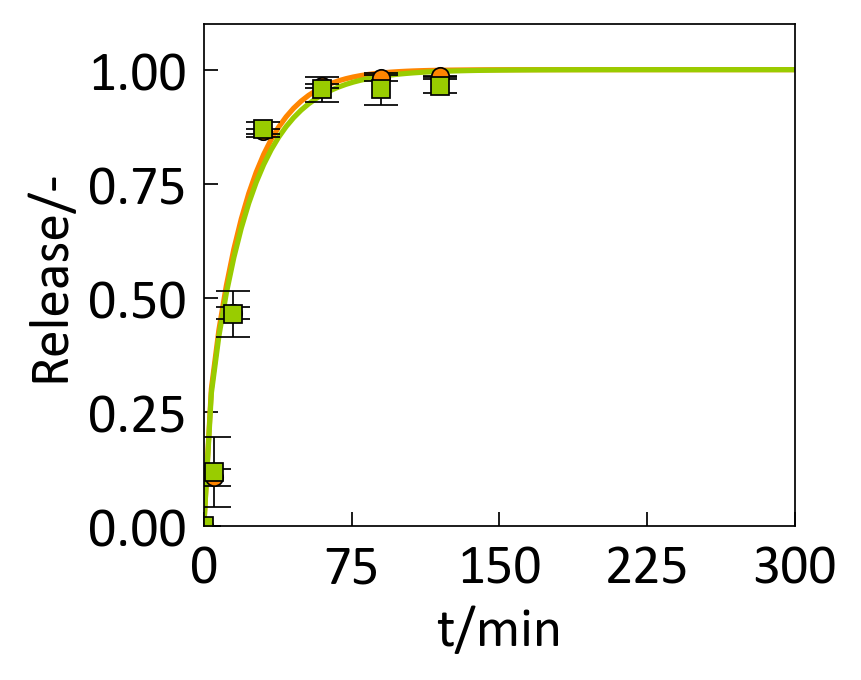

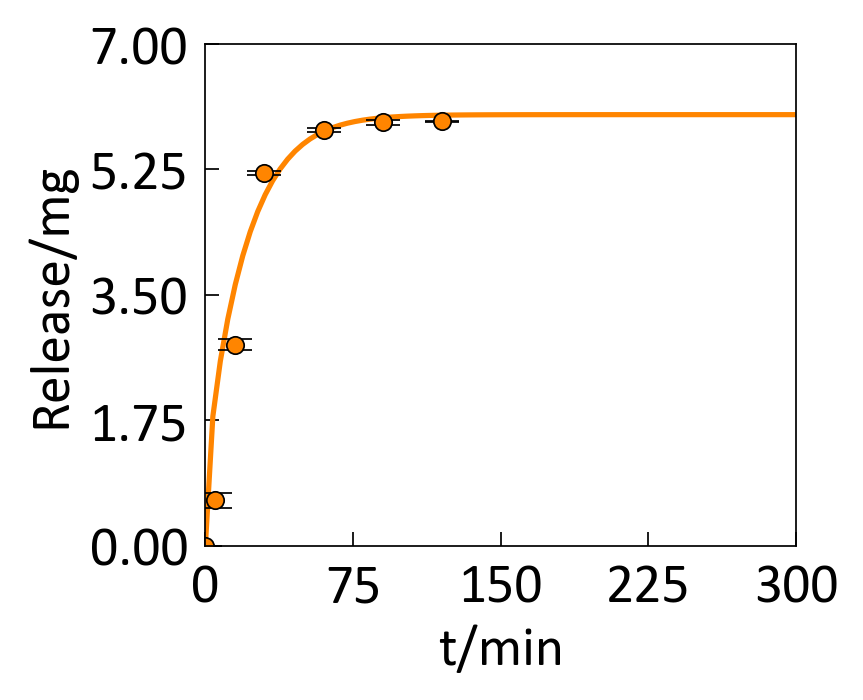

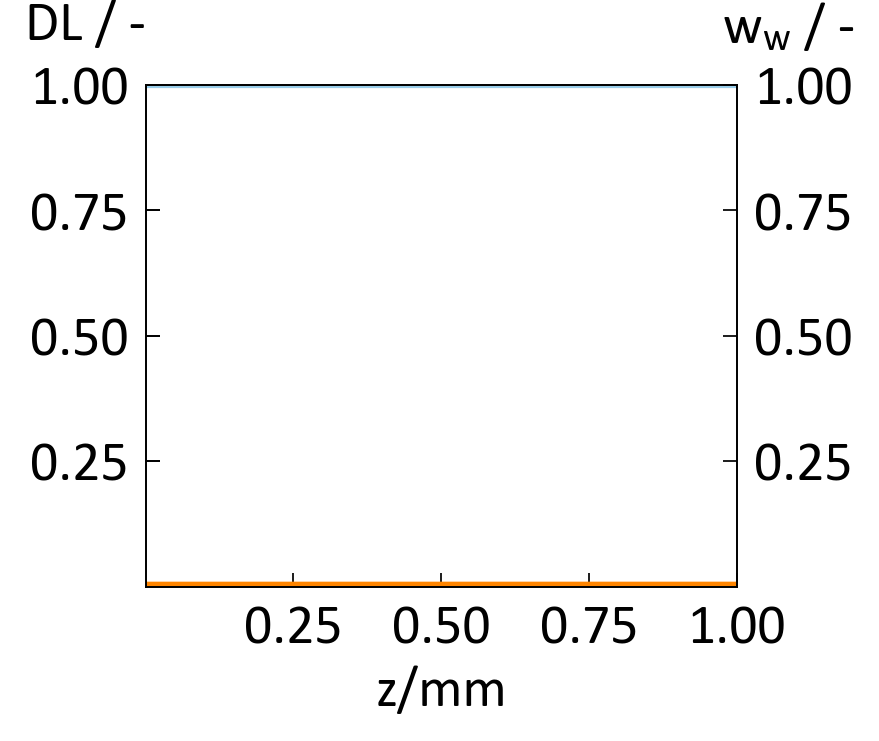

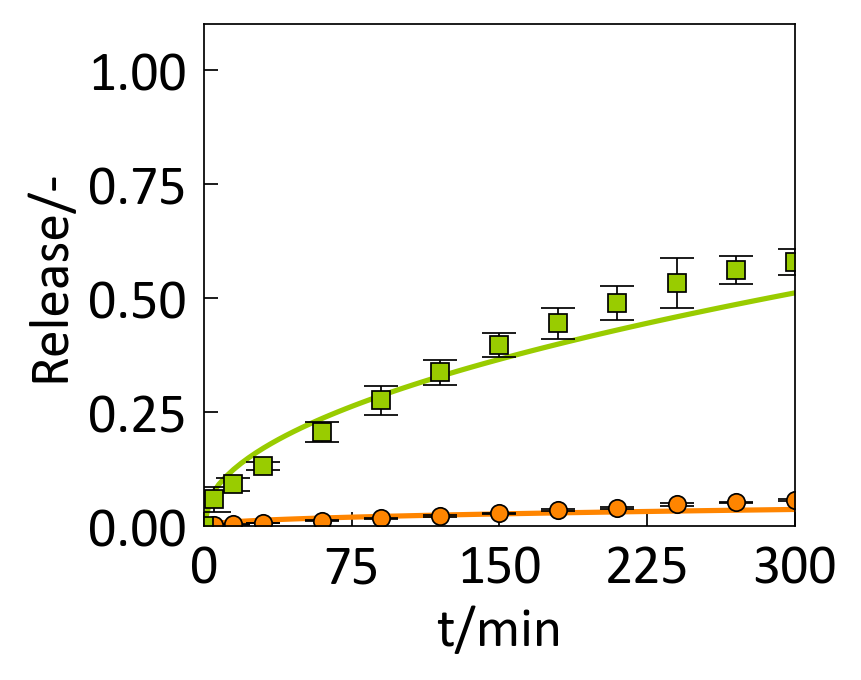

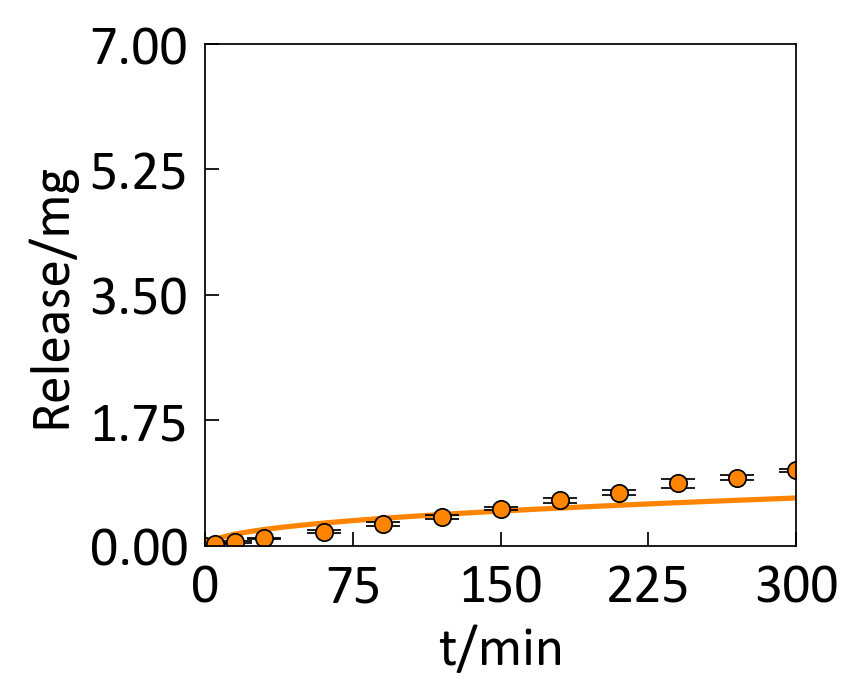

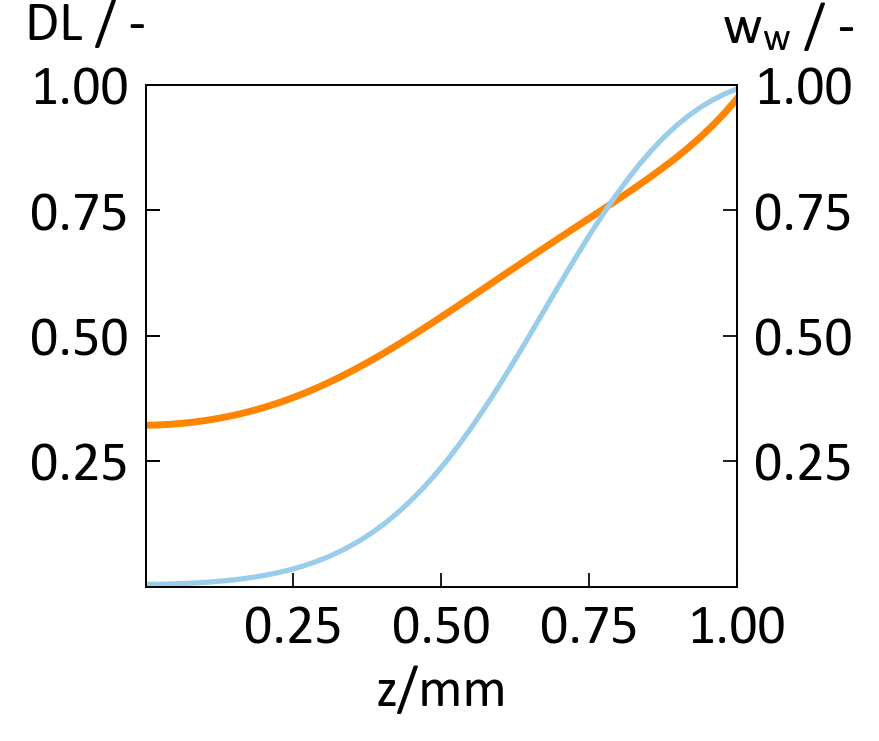

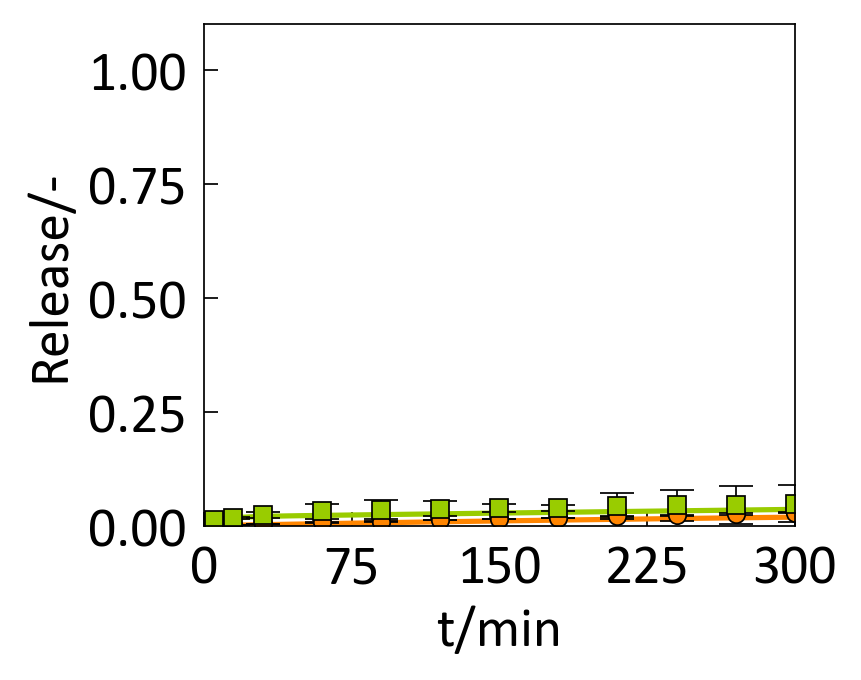

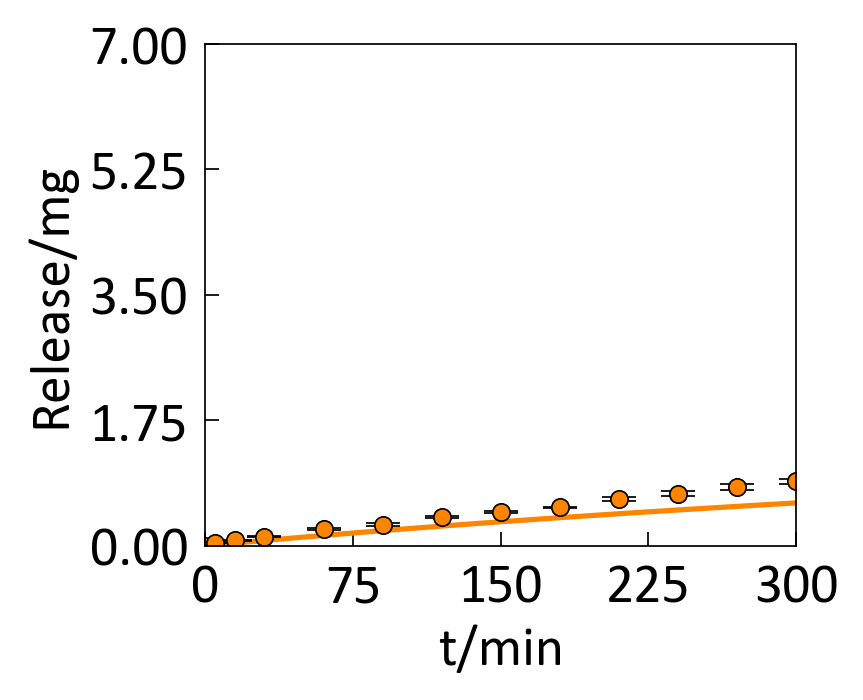

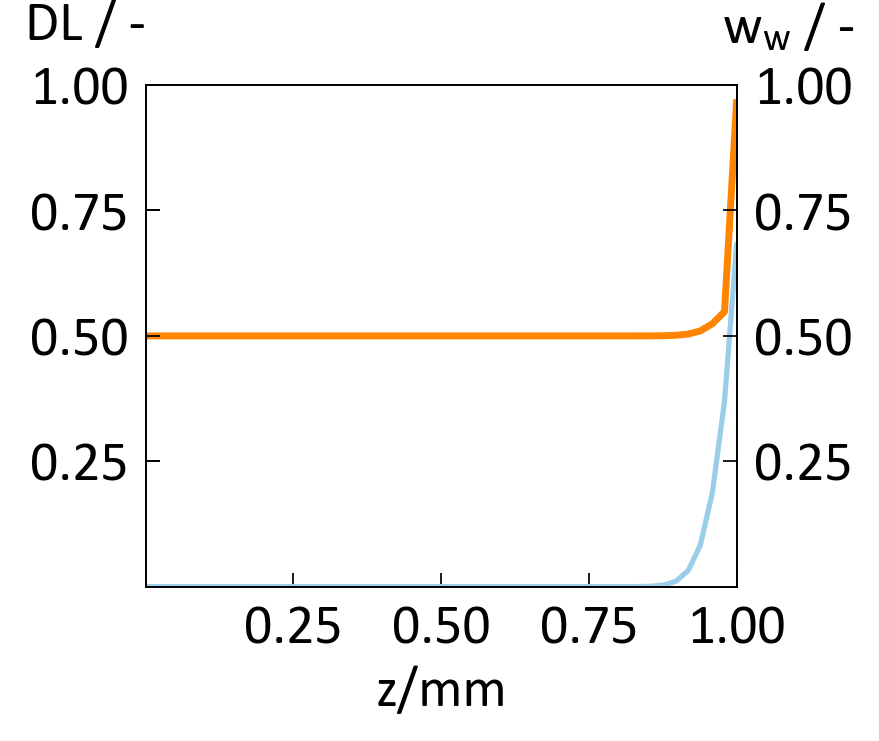

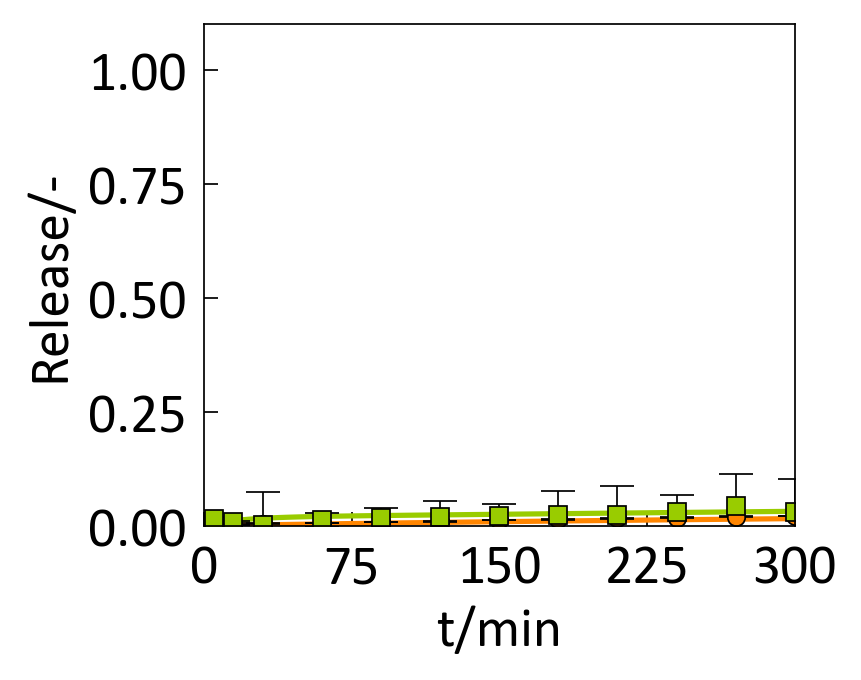

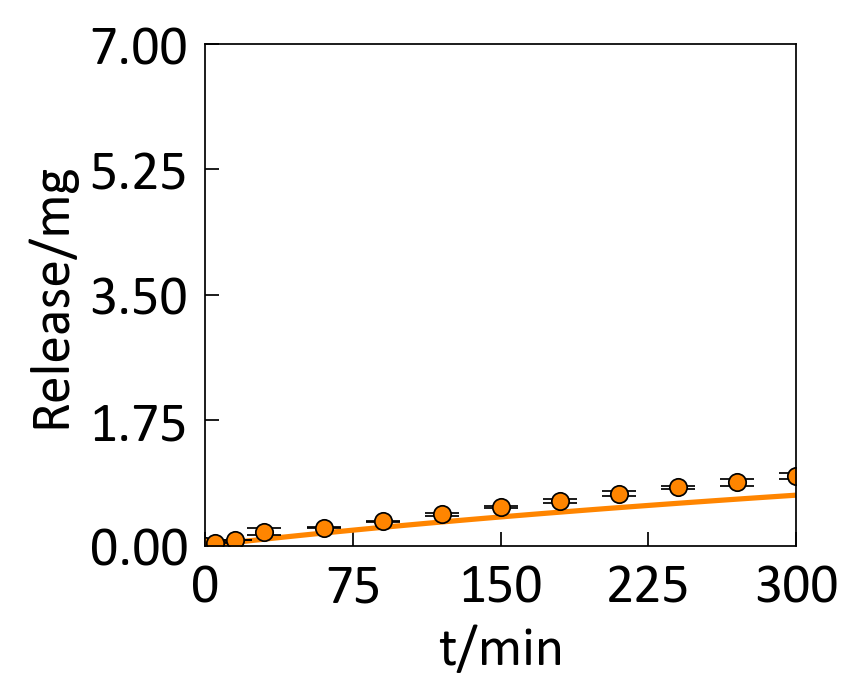

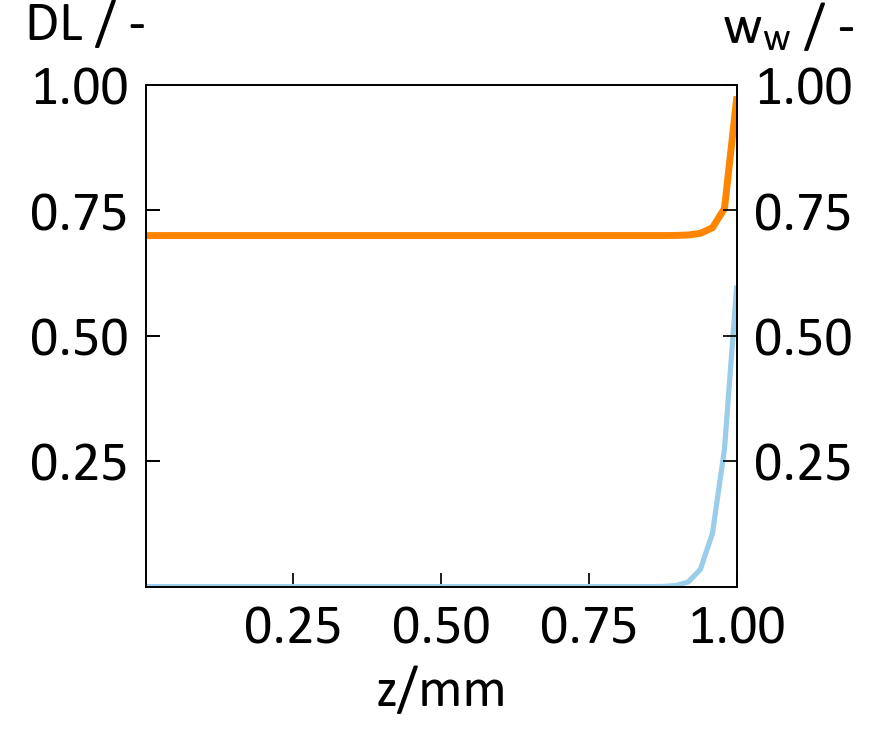

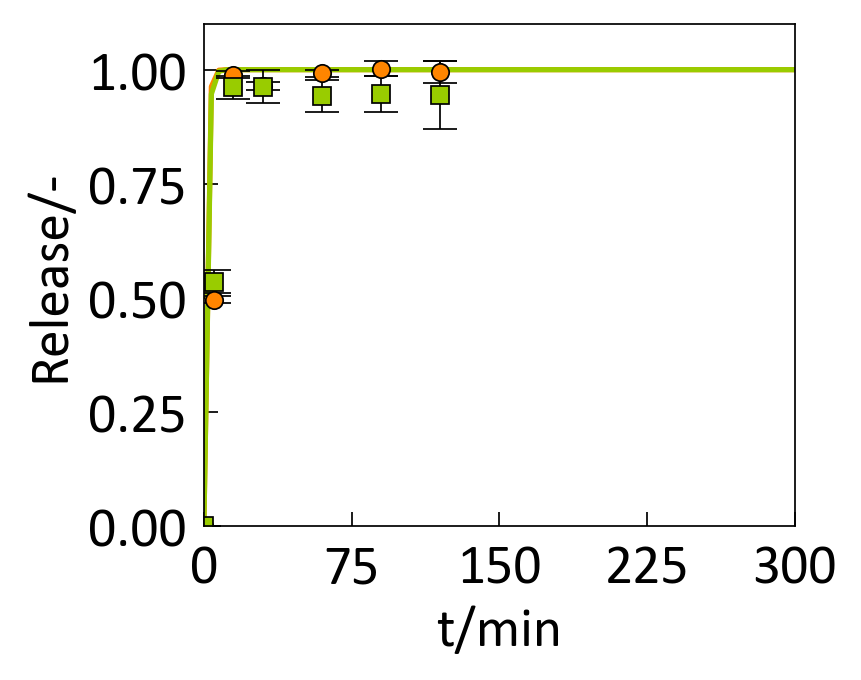

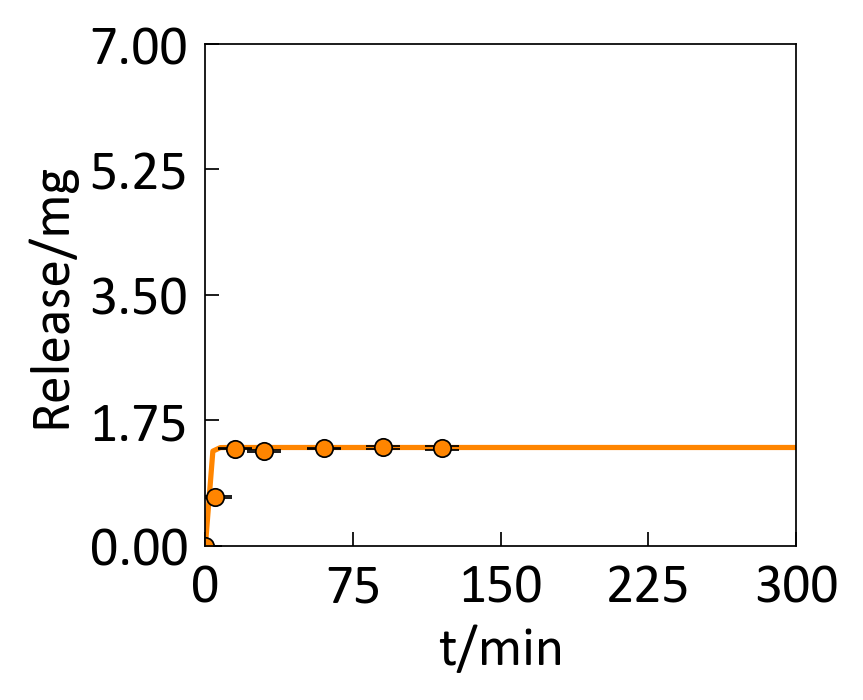

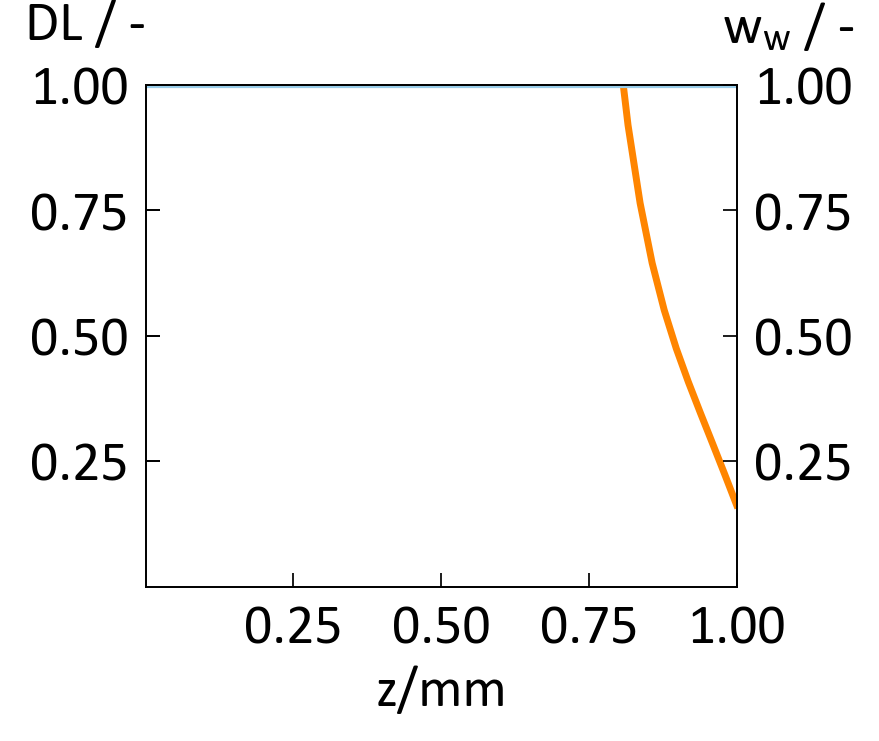

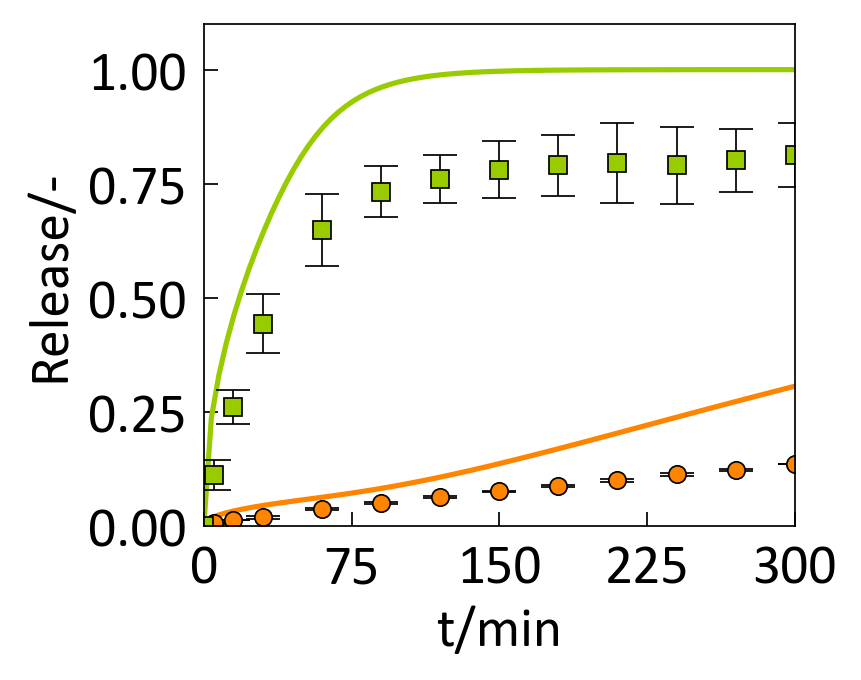

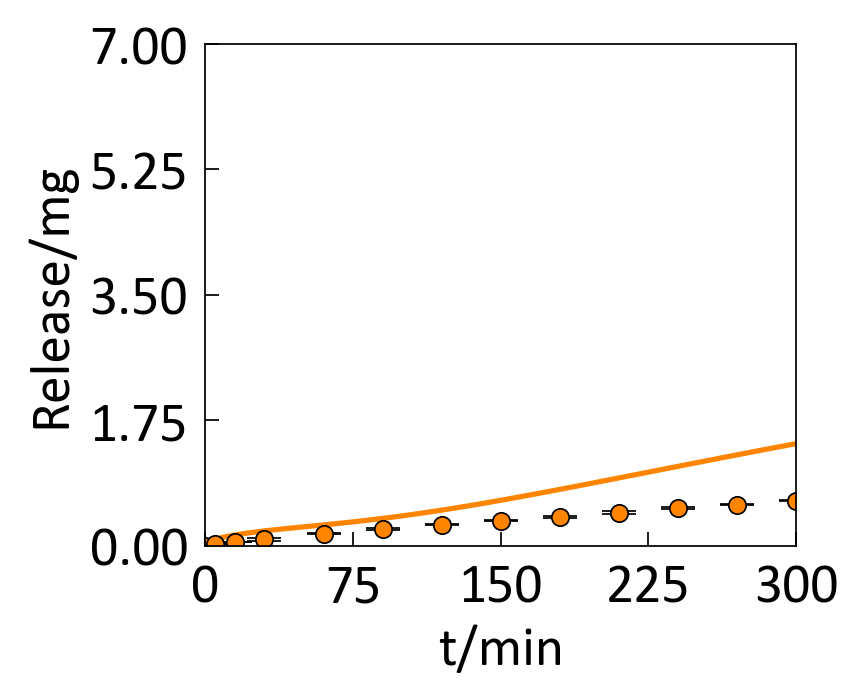

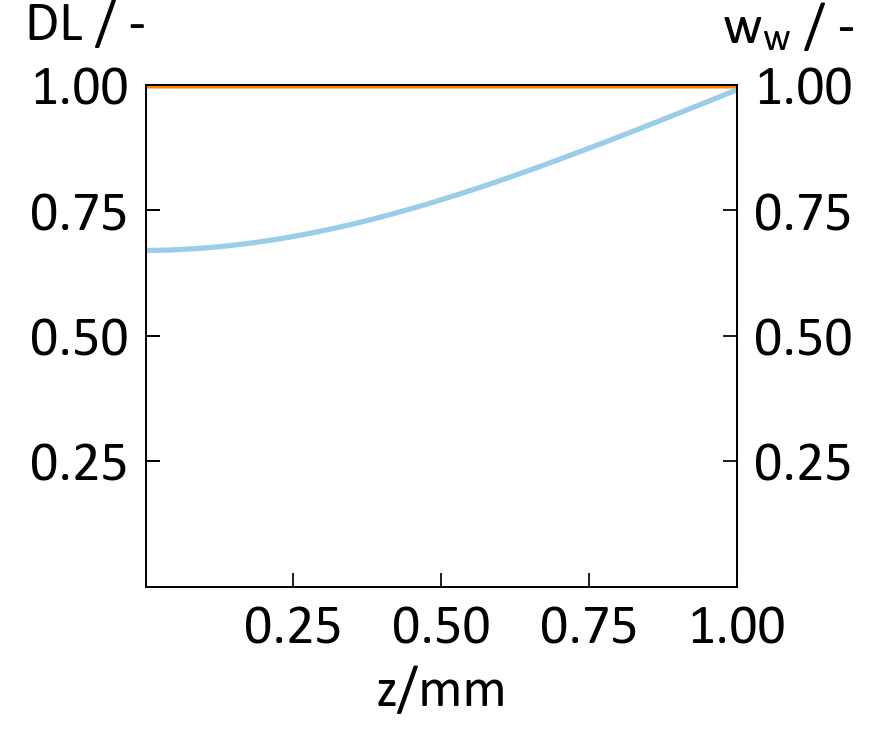

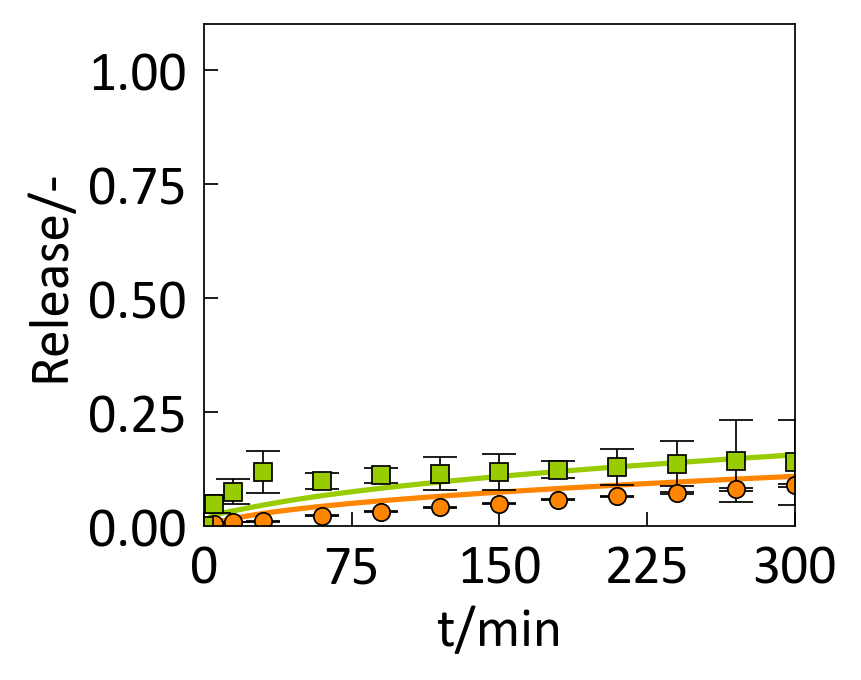

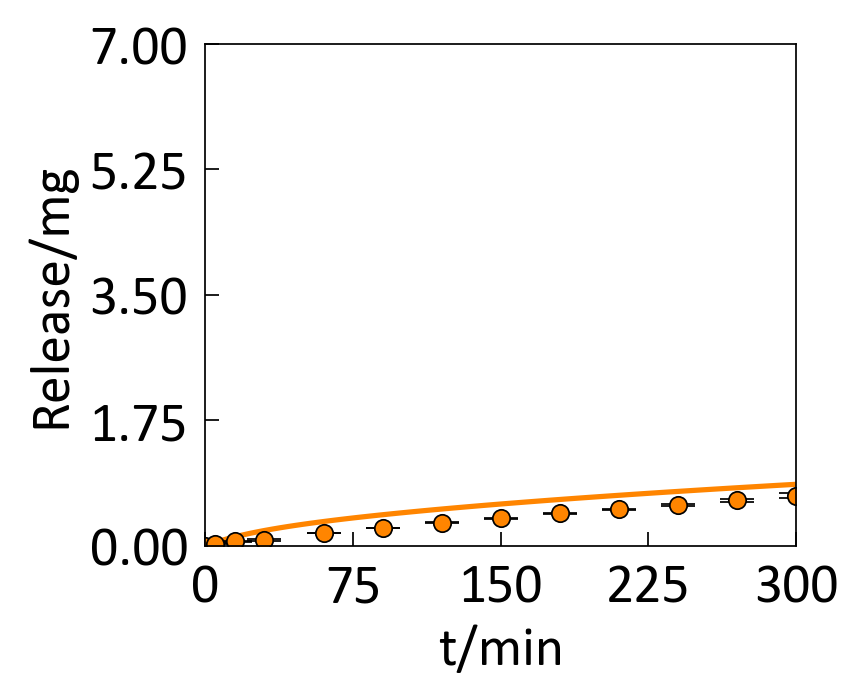

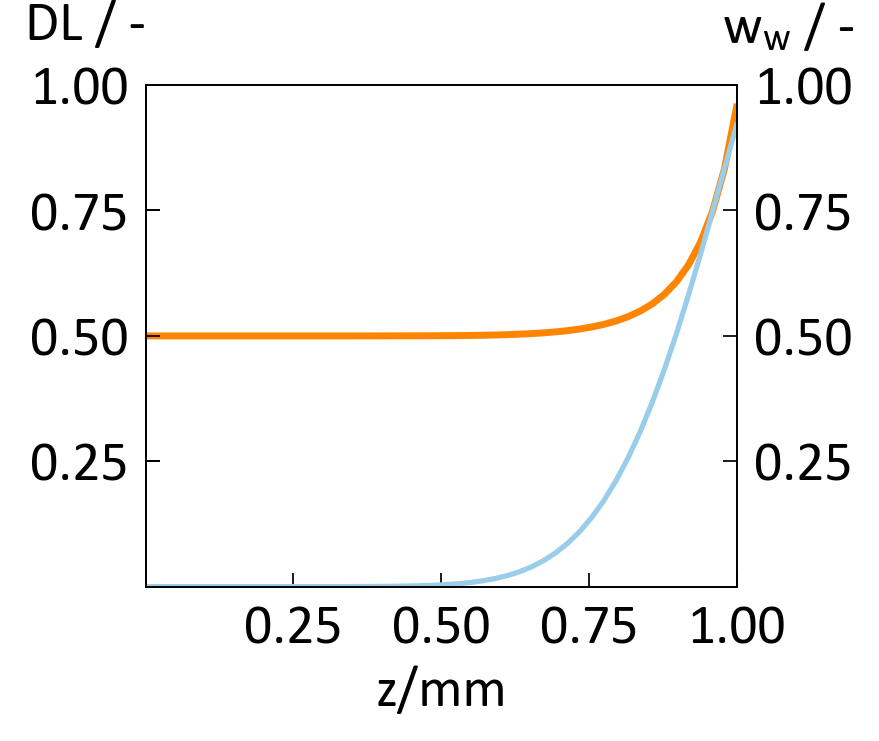

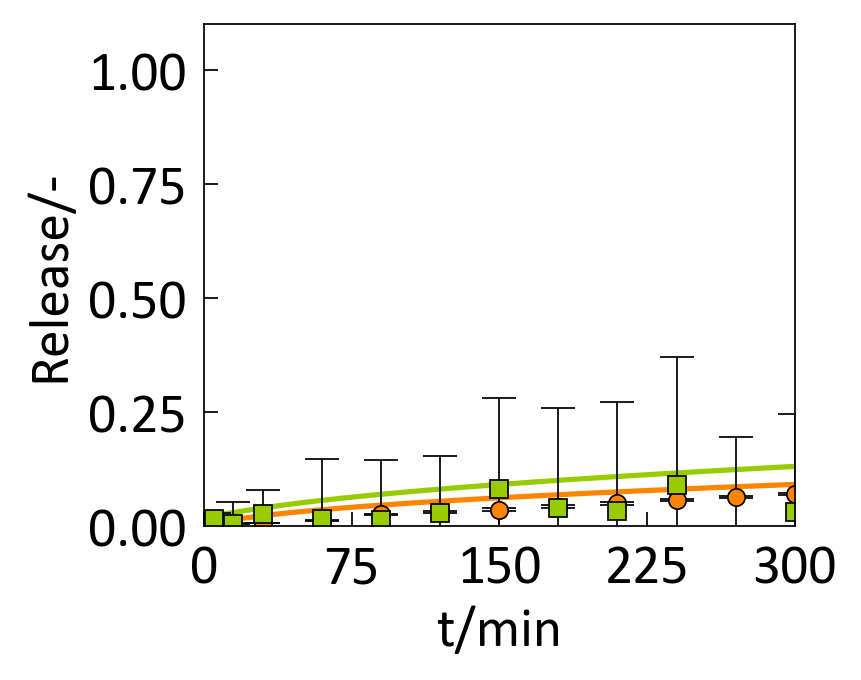

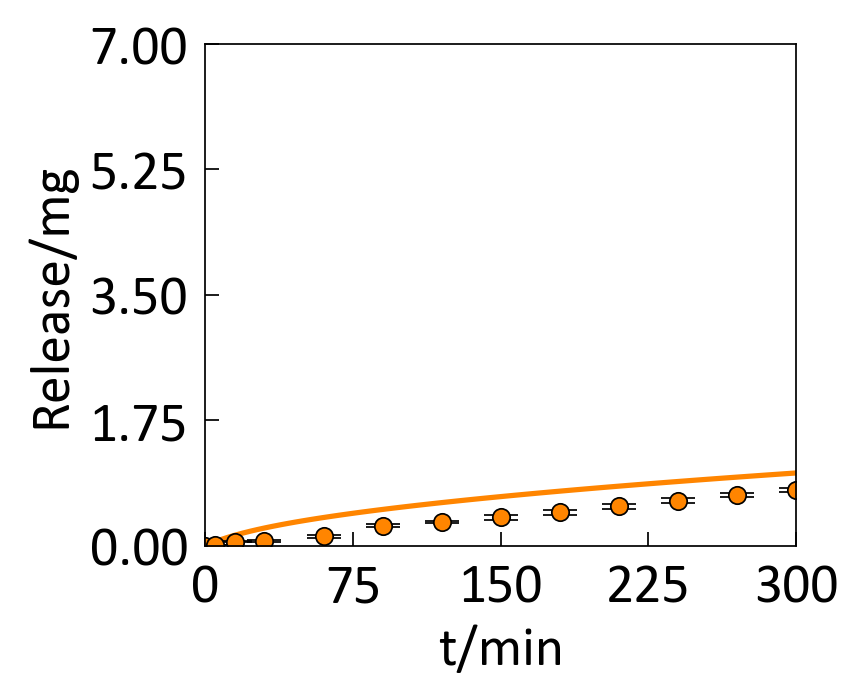

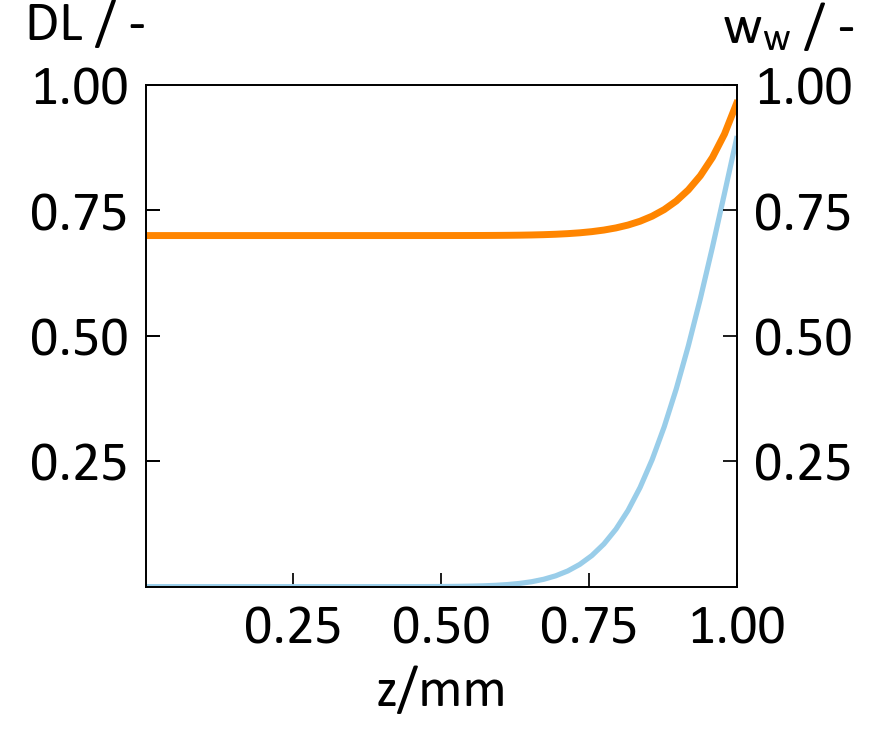

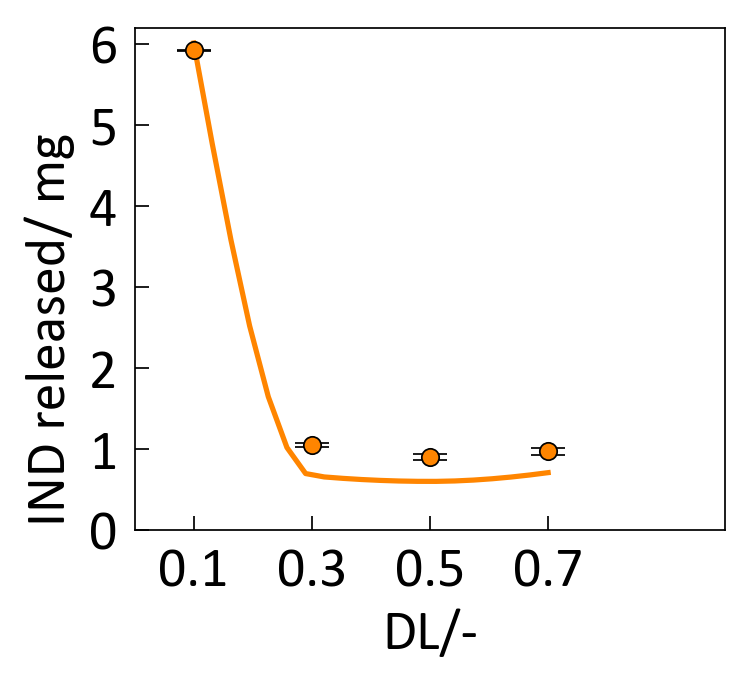

In [5]:


DLvec=np.asarray([0.1,0.3,0.5,0.7])
relL1,relPolL1,relL1exp,relPolL1exp,relL1std,relPolL1std=zip(*[plot(1,val) for val in DLvec])
relL25,relPolL25,relL25exp,relPolL25exp,relL25std,relPolL25std=zip(*[plot(0.25,val) for val in DLvec])
# plot the released API mass  after 300 minutes against the drug load
from scipy.interpolate import pchip_interpolate
DLint=np.linspace(0.1,0.7,20)
m0APIs=np.asarray([values["API_mass/mg"] for keys,values in expdata.items() if 'L:1' in keys])
fig4,ax4=plt.subplots()
ax4.plot(DLint,pchip_interpolate(DLvec,relL1*m0APIs,DLint),'C3-')
ax4.errorbar(DLvec,relL1exp*m0APIs,fmt='C3o',yerr=relL1std*m0APIs,ecolor='k',elinewidth=0.5)
ax4.set_xlabel("DL/-")
ax4.set_ylabel("IND released/ mg")
ax4.yaxis.set_label_coords(-.1, .4)
ax4.set_xticks([0.1,0.3,0.5,0.7])
ax4.set_yticks([0,1,2,3,4,5,6])
ax4.set_xlim([0,1.])
ax4.set_ylim([0,6.2])
plt.show()
plt.close()



In [ ]:
def predict_release(ASD_L,ASD_DL):
    wt=Choose_ASD(ASD_L,ASD_DL)[0]
    return 1-wt[-1,0] /wt[0,0]

Lvec=np.asarray([0.01,0.02,0.03,0.05,0.1,0.125,0.15,0.2,0.3,0.5,1.,1.5,2])#np.linspace(0.1,1.5,15)
relD01=np.asarray([predict_release(val,0.1) for val in Lvec])
relD03=np.asarray([predict_release(val,0.3) for val in Lvec])
relD05=np.asarray([predict_release(val,0.5)for val in Lvec])


print(relD01)
print(relD03)
print(relD05)
Lvec2=np.linspace(0.01,2,20)
smooth=lambda rel: pchip_interpolate(Lvec,rel,Lvec2)
fig1,ax10=plt.subplots()

ax10.set_xlabel("Thickness / mm")
ax10.set_ylabel("API release / -")
ax10.set_yticks([0.,0.5,1,1.5])
# ax10.set_xticks([0,0.3,0.6,0.9,1.2,1.5])
ax10.set_xticks([0.25,1,2])
ax10.set_yticks([0.,0.25,0.5,0.75,1.])
ax10.set_xlim([0.,3])
ax10.set_ylim([0.,1.1])

ax10.plot(Lvec2,smooth(relD01),"C0-")
ax10.plot(Lvec2,smooth(relD03),"C1-")
ax10.plot(Lvec2,smooth(relD05),"C3-")
Lexp=np.asarray([0.25,1.])
relDL01=np.asarray([relL25exp[0],relL1exp[0]])
relDL03=np.asarray([relL25exp[1],relL1exp[1]])
relDL05=np.asarray([relL25exp[2],relL1exp[2]])

ax10.plot(Lexp,relDL01,"C0o")
ax10.plot(Lexp,relDL03,"C1s")
ax10.plot(Lexp,relDL05,"C3^")





L:0.01_DL:0.1
L:0.02_DL:0.1
L:0.03_DL:0.1
L:0.05_DL:0.1
L:0.1_DL:0.1
L:0.125_DL:0.1
L:0.15_DL:0.1
L:0.2_DL:0.1
L:0.3_DL:0.1
L:0.5_DL:0.1
L:1.0_DL:0.1
L:1.5_DL:0.1
L:2.0_DL:0.1
L:0.01_DL:0.3
L:0.02_DL:0.3
L:0.03_DL:0.3
L:0.05_DL:0.3


In [ ]:
# Lvec=np.asarray([0.01,0.05,0.1,0.125,0.15,0.2,0.3,0.5,1.,1.5,2])#np.linspace(0.1,1.5,15)Lvec=np.asarray([0.01,0.1,0.125,0.15,0.2,0.3,0.5,1.,3.])#
fig11,ax11=plt.subplots()
ax11.plot(Lvec,Lvec*6.015,"C0-")
ax11.plot(Lvec,Lvec*18.639,"C1-")
ax11.plot(Lvec,Lvec*31.65,"C3-")

ax11.plot(Lexp,Lexp*6.015,"C0o",markersize=7)
ax11.plot(Lexp,Lexp*18.639,"C1s",markersize=7)
ax11.plot(Lexp,Lexp*31.65,"C3^",markersize=7)


ax11.set_xlabel("Thickness / mm")
ax11.set_ylabel("IND released/ mg")

ax11.set_yticks([0.,10.,20.,30.,40.])

ax11.set_xticks([0.25,1,2])

ax11.set_xlim([0.,2])
ax11.set_ylim([0.,45.])

fig12,ax12=plt.subplots()
ax12.plot(Lvec,relD01*Lvec*6.015,"C0-")
ax12.plot(Lvec,relD03*Lvec*18.639,"C1-")
ax12.plot(Lvec,relD05*Lvec*31.65,"C3-")

ax12.plot(Lexp,Lexp*6.015*relDL01,"C0o",markersize=7)
ax12.plot(Lexp,Lexp*18.639*relDL03,"C1s",markersize=7)
ax12.plot(Lexp,Lexp*31.65*relDL05,"C3^",markersize=7)

ax12.set_xlabel("Thickness / mm")
ax12.set_ylabel("IND released/ mg")
ax12.yaxis.set_label_coords(-.15, .4)

ax12.set_xticks([0.25,1,2])
ax12.set_yticks([0.,5.,10.,15.,20.])
ax12.set_xlim([0.,2])
ax12.set_ylim([0.,15.])


fig13,ax13=plt.subplots()
ax13.plot(Lvec,(1-relD01)*Lvec*6.015,"C0-")
ax13.plot(Lvec,(1-relD03)*Lvec*18.639,"C1-")
ax13.plot(Lvec,(1-relD05)*Lvec*31.65,"C3-")

line=ax13.plot(Lexp,Lexp*6.015*(1-relDL01),"C0o",markersize=7)[0]
ax13.plot(Lexp,Lexp*18.639*(1-relDL03),"C1s",markersize=7)
ax13.plot(Lexp,Lexp*31.65*(1-relDL05),"C3^",markersize=7)
line.set_clip_on(False)
ax13.set_xlabel("Thickness / mm")
ax13.set_ylabel("IND not released/ mg")


ax13.set_xticks([0.25,1,2])
ax13.set_yticks([0.,10.,20.,30.,40.])
ax13.set_xlim([0.,2])
ax13.set_ylim([0.,40.])
ax13.set_axisbelow(True)   

fig77,ax77=plt.subplots()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)    
ax77.set_xlabel("Thickness / mm")
ax77.set_ylabel("IND not released/ mg")
ax77.plot(Lvec,(1-relD01)*Lvec*6.015,"C0-",linewidth=3)
ax77.plot(Lvec,(1-relD03)*Lvec*18.639,"C1-",linewidth=3)
ax77.plot(Lvec,(1-relD05)*Lvec*31.65,"C3-",linewidth=3)

line=ax77.plot(Lexp[0],Lexp[0]*6.015*(1-relDL01[0]),"C0o",markersize=10,markeredgewidth=1)[0]
line.set_clip_on(False)
ax77.plot(Lexp,Lexp*18.639*(1-relDL03),"C1s",markersize=10,markeredgewidth=1)
ax77.plot(Lexp,Lexp*31.65*(1-relDL05),"C3^",markersize=10,markeredgewidth=1)

ax77.set_xticks([0.1,0.2,0.3])
ax77.set_yticks([0.,2.,4.,6.,8.])
ax77.set_xlim([0.,0.3])
ax77.set_ylim([0.,10.])
ax77.set_axisbelow(True)


fig88,ax88=plt.subplots()
ax88.plot(Lvec,relD01*Lvec*6.015,"C0-",linewidth=3)
ax88.plot(Lvec,relD03*Lvec*18.639,"C1-",linewidth=3)
ax88.plot(Lvec,relD05*Lvec*31.65,"C3-",linewidth=3)

ax88.plot(Lexp,Lexp*6.015*relDL01,"C0o",markersize=10,markeredgewidth=1)
ax88.plot(Lexp,Lexp*18.639*relDL03,"C1s",markersize=10,markeredgewidth=1)
ax88.plot(Lexp,Lexp*31.65*relDL05,"C3^",markersize=10,markeredgewidth=1)

ax88.set_xlabel("Thickness / mm")
ax88.set_ylabel("IND released/ mg")
ax88.yaxis.set_label_coords(-.15, .4)




ax88.set_xticks([0.1,0.2,0.3])
ax88.set_yticks([0.,2.,4.,6.,8.])
ax88.set_xlim([0.,0.3])
ax88.set_ylim([0.,10.])
ax88.set_axisbelow(True)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)    
# origin_like.plot(ax10,np.array([0.25]),np.array([relL25exp[0]]),'c^',yerr=np.array([relL25std[0]]))
# origin_like.plot(ax10,np.array([0.25]),np.array([relL25exp[1]]),'ko',yerr=np.array([relL25std[1]]))
# origin_like.plot(ax10,np.array([0.25]),np.array([relL25exp[2]]),'ys',yerr=np.array([relL25std[2]]))

# origin_like.plot(ax10,np.array([1]),np.array([relL1exp[0]]),'c^',yerr=np.array([relL1std[0]]))
# origin_like.plot(ax10,np.array([1]),np.array([relL1exp[1]]),'ko',yerr=np.array([relL1std[1]]))
# origin_like.plot(ax10,np.array([1]),np.array([relL1exp[2]]),'ys',yerr=np.array([relL1std[2]]))

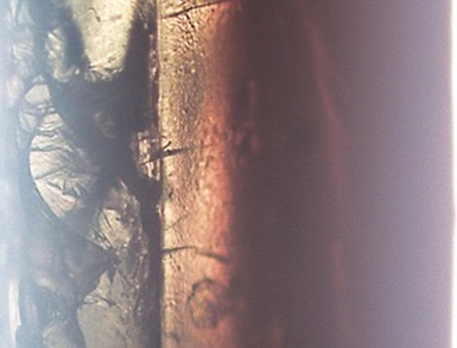
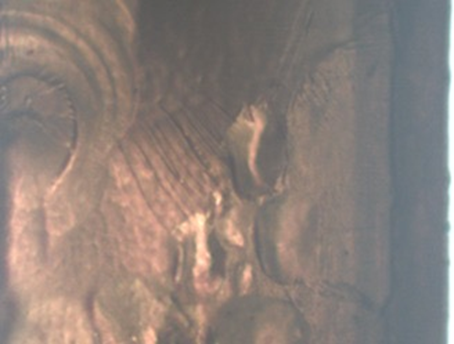
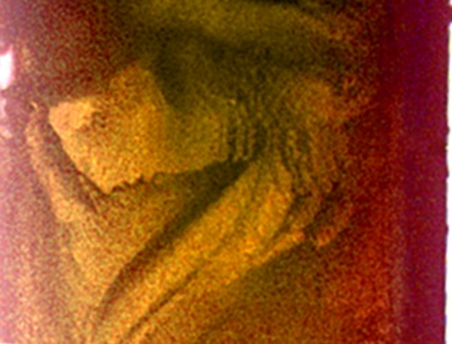


In [ ]:
# Spin=np.array([[0.016, 0.06799999999999999, 0.916], [0.016, 0.072, 0.912], [0.016, 0.076, 0.908], [0.016, 0.08, 0.904], [0.016, 0.084, 0.9], [0.016, 0.088, 0.896], [0.016, 0.092, 0.892], [0.016, 0.624, 0.36], [0.02, 0.732, 0.248], [0.024, 0.776, 0.19999999999999996], [0.032, 0.8119999999999999, 0.15600000000000003], [0.036000000000000004, 0.82, 0.14400000000000002], [0.04, 0.824, 0.136], [0.048, 0.828, 0.124], [0.052000000000000005, 0.828, 0.12], [0.056, 0.828, 0.11599999999999999], [0.084, 0.812, 0.10399999999999998], [0.108, 0.792, 0.09999999999999998], [0.264, 0.636, 0.09999999999999998], [0.268, 0.632, 0.09999999999999998], [0.34800000000000003, 0.548, 0.10399999999999998], [0.352, 0.544, 0.10399999999999998], [0.424, 0.468, 0.10799999999999998], [0.492, 0.396, 0.11199999999999999], [0.496, 0.392, 0.11199999999999999], [0.5640000000000001, 0.31999999999999995, 0.11599999999999999], [0.5680000000000001, 0.31599999999999995, 0.11599999999999999], [0.628, 0.252, 0.12], [0.632, 0.248, 0.12], [0.636, 0.244, 0.12], [0.6960000000000001, 0.17999999999999994, 0.124], [0.7000000000000001, 0.17599999999999993, 0.124], [0.704, 0.17200000000000004, 0.124], [0.756, 0.11599999999999999, 0.128], [0.76, 0.11199999999999999, 0.128], [0.764, 0.10799999999999998, 0.128], [0.768, 0.10399999999999998, 0.128], [0.772, 0.09999999999999998, 0.128], [0.776, 0.09599999999999997, 0.128], [0.78, 0.09199999999999997, 0.128], [0.812, 0.05599999999999994, 0.132], [0.8160000000000001, 0.051999999999999935, 0.132], [0.8200000000000001, 0.04799999999999993, 0.132], [0.8240000000000001, 0.04399999999999993, 0.132], [0.8280000000000001, 0.039999999999999925, 0.132], [0.8320000000000001, 0.03599999999999992, 0.132], [0.836, 0.03200000000000003, 0.132], [0.84, 0.028000000000000025, 0.132], [0.844, 0.020000000000000018, 0.136], [0.844, 0.02400000000000002, 0.132], [0.848, 0.016000000000000014, 0.136], [0.848, 0.020000000000000018, 0.132], [0.852, 0.01200000000000001, 0.136], [0.852, 0.016000000000000014, 0.132], [0.856, 0.01200000000000001, 0.132], [0.86, 0.01200000000000001, 0.128]])

Binr=np.array([[0.32074, 0.05069, 0.62857], [0.38227, 0.0463, 0.57143], [0.44275, 0.04296, 0.51429], [0.50253, 0.04033, 0.45714], [0.5618, 0.0382, 0.4], [0.62068, 0.03646, 0.34286], [0.67927, 0.03502, 0.28571], [0.73761, 0.03382, 0.22857], [0.79576, 0.03281, 0.17143], [0.85374, 0.03197, 0.11429], [0.91159, 0.03127, 0.05714], [0.96159, 0.03127, 0]])
Binl=np.asarray([[0.000965, 0.31331, 0.68572], [0.000341, 0.36452, 0.63513], [0.000118, 0.4178, 0.58209], [4.07e-05, 0.47317, 0.52679], [1.42e-05, 0.53043, 0.46955], [5.08e-06, 0.58921, 0.41079], [1.9e-06, 0.64902, 0.35098], [7.5e-07, 0.70936, 0.29063], [3.15e-07, 0.76973, 0.23027], [1.42e-07, 0.82965, 0.17035], [6.79e-08, 0.88881, 0.11119], [1.99e-07, 0.99996, 3.61e-05]])
SLE=np.asarray([[0.31535, 3.5599999999999995e-24, 0.68465],[0.29868, 0.03341, 0.66791], [0.26245, 0.06228, 0.67527], [0.22604, 0.08571, 0.68825], [0.19335, 0.1046, 0.70205], [0.16505, 0.12004, 0.7149], [0.14082, 0.13294, 0.72624], [0.12004, 0.14398, 0.73597], [0.10213, 0.15367, 0.7442], [0.08657, 0.16238, 0.75104], [0.07295, 0.17042, 0.75664], [0.06091, 0.17803, 0.76106], [0.05018, 0.18545, 0.76437], [0.04055, 0.19293, 0.76652], [0.03183, 0.20077, 0.7674], [0.02386, 0.20947, 0.76667], [0.01653, 0.2199, 0.76357], [0.0097, 0.23434, 0.75596], [0.00331, 0.26295, 0.73374],[0, 1, 0],[1, 0, 0],[0.31535, 3.5599999999999995e-24, 0.68465]])
TG=np.asarray([[0.96265, 0.03735, 0.0],[0.61807, 0.0729, 0.30903], [0.29803, 0.10591, 0.59606], [0.0, 0.13666, 0.86334], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0] ])
DL03sorp=np.asarray([[0.69788, 0.00304, 0.29909], [0.69706, 0.00421, 0.29874], [0.69646, 0.00505, 0.29848], [0.696, 0.00572, 0.29828], [0.69559, 0.0063, 0.29811], [0.69523, 0.00681, 0.29796], [0.69489, 0.0073, 0.29781], [0.69458, 0.00774, 0.29768], [0.69429, 0.00815, 0.29755], [0.69402, 0.00854, 0.29744], [0.69376, 0.00891, 0.29733], [0.69351, 0.00927, 0.29722], [0.69327, 0.00961, 0.29712], [0.69305, 0.00993, 0.29702], [0.69283, 0.01024, 0.29693], [0.69263, 0.01054, 0.29684], [0.69242, 0.01083, 0.29675], [0.69222, 0.01111, 0.29667], [0.69203, 0.01139, 0.29658], [0.69184, 0.01166, 0.2965], [0.69166, 0.01192, 0.29642], [0.69147, 0.01219, 0.29634], [0.6913, 0.01242, 0.29627], [0.69112, 0.01268, 0.2962], [0.69096, 0.01292, 0.29612], [0.69079, 0.01315, 0.29605], [0.69063, 0.01339, 0.29598], [0.69048, 0.01361, 0.29592], [0.69032, 0.01382, 0.29585], [0.69017, 0.01405, 0.29579], [0.69002, 0.01426, 0.29572], [0.68987, 0.01447, 0.29566], [0.68974, 0.01465, 0.2956], [0.6896, 0.01486, 0.29554], [0.68947, 0.01504, 0.29549], [0.68935, 0.01522, 0.29543], [0.68921, 0.01541, 0.29538], [0.68909, 0.01558, 0.29533], [0.68898, 0.01574, 0.29528], [0.68887, 0.0159, 0.29523], [0.68875, 0.01607, 0.29518], [0.68864, 0.01623, 0.29513], [0.68852, 0.01639, 0.29508], [0.68843, 0.01653, 0.29504], [0.68833, 0.01668, 0.295], [0.68821, 0.01684, 0.29495], [0.68809, 0.01702, 0.2949], [0.68798, 0.01717, 0.29485], [0.68788, 0.01731, 0.29481], [0.68778, 0.01745, 0.29476], [0.68768, 0.0176, 0.29472], [0.68758, 0.01774, 0.29468], [0.68748, 0.01789, 0.29463], [0.68738, 0.01804, 0.29459], [0.68728, 0.01817, 0.29455], [0.68718, 0.01832, 0.2945], [0.68708, 0.01845, 0.29446], [0.68698, 0.0186, 0.29442], [0.68688, 0.01874, 0.29438], [0.68679, 0.01887, 0.29434], [0.68669, 0.01901, 0.2943], [0.6866, 0.01915, 0.29426], [0.6865, 0.01929, 0.29421], [0.68641, 0.01942, 0.29418], [0.68632, 0.01955, 0.29414], [0.68622, 0.01968, 0.2941], [0.68613, 0.01981, 0.29406], [0.68604, 0.01994, 0.29402], [0.68595, 0.02007, 0.29398], [0.68586, 0.02019, 0.29394], [0.68578, 0.02032, 0.2939]])
DL05sorp=np.asarray([[0.49745, 0.0051, 0.49745], [0.4963, 0.0074, 0.4963], [0.4955, 0.009, 0.4955], [0.49485, 0.01029, 0.49485], [0.4943, 0.0114, 0.4943], [0.49381, 0.01238, 0.49381], [0.49336, 0.01327, 0.49336], [0.49296, 0.01408, 0.49296], [0.49258, 0.01484, 0.49258], [0.49223, 0.01554, 0.49223], [0.4919, 0.0162, 0.4919], [0.49159, 0.01682, 0.49159], [0.49129, 0.01742, 0.49129], [0.49101, 0.01798, 0.49101], [0.49074, 0.01852, 0.49074], [0.49048, 0.01904, 0.49048], [0.49023, 0.01954, 0.49023], [0.48999, 0.02002, 0.48999], [0.48976, 0.02049, 0.48976], [0.48953, 0.02094, 0.48953], [0.48931, 0.02137, 0.48931], [0.4891, 0.0218, 0.4891], [0.4889, 0.02221, 0.4889], [0.4887, 0.0226, 0.4887], [0.4885, 0.02299, 0.4885], [0.48831, 0.02337, 0.48831], [0.48813, 0.02374, 0.48813], [0.48795, 0.0241, 0.48795], [0.48778, 0.02445, 0.48778], [0.4876, 0.02479, 0.4876], [0.48743, 0.02513, 0.48743], [0.48727, 0.02546, 0.48727], [0.48711, 0.02578, 0.48711], [0.48695, 0.0261, 0.48695], [0.4868, 0.02641, 0.4868], [0.48665, 0.02671, 0.48665], [0.4865, 0.02701, 0.4865], [0.48635, 0.0273, 0.48635], [0.48621, 0.02759, 0.48621], [0.48607, 0.02787, 0.48607], [0.48593, 0.02814, 0.48593], [0.48579, 0.02842, 0.48579], [0.48566, 0.02869, 0.48566], [0.48552, 0.02895, 0.48552], [0.4854, 0.02921, 0.4854], [0.48527, 0.02946, 0.48527], [0.48514, 0.02971, 0.48514], [0.48502, 0.02996, 0.48502], [0.4849, 0.0302, 0.4849], [0.48478, 0.03045, 0.48478], [0.48466, 0.03068, 0.48466], [0.48454, 0.03091, 0.48454], [0.48443, 0.03114, 0.48443], [0.48432, 0.03136, 0.48432], [0.48421, 0.03157, 0.48421], [0.48411, 0.03178, 0.48411], [0.48401, 0.03199, 0.48401], [0.48391, 0.03219, 0.48391]])
DL07sorp=np.asarray([[0.29749, 0.00835, 0.69415], [0.29567, 0.01443, 0.6899], [0.29416, 0.01947, 0.68637], [0.29283, 0.0239, 0.68327], [0.29163, 0.0279, 0.68047], [0.29053, 0.03158, 0.6779], [0.2895, 0.035, 0.6755], [0.28854, 0.03821, 0.67325], [0.28762, 0.04125, 0.67112], [0.28676, 0.04413, 0.66911], [0.28593, 0.04689, 0.66718], [0.28514, 0.04952, 0.66534], [0.28439, 0.05204, 0.66357], [0.28366, 0.05447, 0.66187], [0.28296, 0.05681, 0.66023], [0.28228, 0.05906, 0.65865], [0.28163, 0.06124, 0.65713], [0.28099, 0.06336, 0.65565], [0.28038, 0.06541, 0.65421], [0.27978, 0.0674, 0.65282], [0.2792, 0.06934, 0.65146], [0.27863, 0.07123, 0.65014], [0.27808, 0.07306, 0.64886], [0.27754, 0.07485, 0.6476], [0.27702, 0.07659, 0.64638], [0.27651, 0.07829, 0.6452], [0.27601, 0.07996, 0.64403], [0.27553, 0.08158, 0.6429], [0.27505, 0.08317, 0.64178], [0.27458, 0.08472, 0.6407], [0.27413, 0.08624, 0.63963], [0.27368, 0.08774, 0.63858], [0.27324, 0.08921, 0.63755], [0.27281, 0.09064, 0.63655], [0.27238, 0.09205, 0.63556], [0.27197, 0.09344, 0.63459], [0.27156, 0.09479, 0.63365], [0.27116, 0.09612, 0.63271], [0.27077, 0.09743, 0.6318], [0.27039, 0.09871, 0.6309], [0.27001, 0.09997, 0.63002], [0.26964, 0.10122, 0.62915], [0.26927, 0.10244, 0.6283], [0.26891, 0.10364, 0.62745], [0.26856, 0.10481, 0.62663], [0.26821, 0.10597, 0.62582], [0.26787, 0.10712, 0.62502], [0.26753, 0.10824, 0.62423], [0.2672, 0.10935, 0.62346], [0.26687, 0.11044, 0.6227], [0.26655, 0.11151, 0.62195], [0.26623, 0.11256, 0.62121], [0.26592, 0.1136, 0.62048], [0.26561, 0.11463, 0.61976], [0.26531, 0.11565, 0.61905], [0.26501, 0.11665, 0.61835], [0.26471, 0.11763, 0.61766], [0.26442, 0.1186, 0.61698], [0.26413, 0.11956, 0.61631], [0.26385, 0.1205, 0.61565]])
Binr1,Binr2,Binr3=Binr[:,0],Binr[:,1],Binr[:,2]
Binl1,Binl2,Binl3=Binl[:,0],Binl[:,1],Binl[:,2]
isohumide95=np.asarray([[0.97, 0.03, 0.],[0.66467, 0.05047, 0.28486],[0.4527, 0.09459, 0.4527],[0.25562, 0.14793, 0.59645],[0.162, 0.19, 0.648],[0., 0.35, 0.65]])
wiso95=isohumide95[:,1] 
piso95=isohumide95[:,2]
aiso95=isohumide95[:,0]
dliso95=aiso95/(aiso95+piso95)
dlvec=np.linspace(0,1,50)
from scipy.interpolate import Akima1DInterpolator
wwvec=Akima1DInterpolator((1-dliso95),wiso95)(1-dlvec)

SLE1,SLE2,SLE3=SLE[:,0],SLE[:,1],SLE[:,2]
TG1,TG2,TG3=TG[:,0],TG[:,1],TG[:,2]
DL03sorp1,DL03sorp2,DL03sorp3=DL03sorp[:,0],DL03sorp[:,1],DL03sorp[:,2]
DL05sorp1,DL05sorp2,DL05sorp3=DL05sorp[:,0],DL05sorp[:,1],DL05sorp[:,2]
DL07sorp1,DL07sorp2,DL07sorp3=DL07sorp[:,0],DL07sorp[:,1],DL07sorp[:,2]
wH2O_ASD03=np.asarray([0.0, 0.04444354838720636, 0.07079032258054091, 0.10485483870954994, 0.16859677419389293, 0.2291129032256349, 0.2844758064516232, 0.34028225806469864, 0.3871532258061375, 0.43114516129035574, 0.47674193548363053, 0.5056693548386878, 0.5301129032256772])
wPol_ASD03=np.asarray([0.7, 0.6583169354838709, 0.6345629838709677, 0.6056548387096774, 0.5525225806451612, 0.5036443548387096, 0.45992580645161285, 0.4170596774193548, 0.3840427419354839, 0.3525298387096774, 0.32231774193548385, 0.3025814516129032, 0.2899298387096774])
wAPI_ASD03=np.asarray([0.3, 0.2972397258064516, 0.29465021774193545, 0.2894925, 0.2788832258064516, 0.2672391129032258, 0.25559862903225805, 0.24265467741935481, 0.22880120967741935, 0.216325, 0.20094274193548387, 0.1917532258064516, 0.17995483870967743])
wH2O_ASD05=np.asarray([0.0, 0.010563492063438967, 0.017380952381055675, 0.02603174603214214, 0.04235714285753701, 0.050976190476013025, 0.06461111111124644, 0.07237301587303076, 0.07998412698388052, 0.09487301587286272, 0.10405555555563561, 0.11461111111136253, 0.1254047619046188])
wPol_ASD05=np.asarray([0.5, 0.4941679523809524, 0.491499126984127, 0.4886977777777778, 0.48520793650793653, 0.48413626984126984, 0.4837631746031746, 0.48374142857142854, 0.4843733333333333, 0.48302285714285714, 0.48261785714285715, 0.4828198412698413, 0.48214380952380953])
wAPI_ASD05=np.asarray([0.5, 0.49527250793650796, 0.4911185714285714, 0.48527103174603176, 0.4724353968253968, 0.4648911904761905, 0.45162944444444447, 0.44388492063492063, 0.4356454761904762, 0.4221036507936508, 0.4133246031746032, 0.4025722222222222, 0.39245079365079366])
wH2O_ASD07=np.asarray([0.0, 0.009343750000286033, 0.011148437500420327, 0.022257812500210694, 0.03143749999993256, 0.0430390624996807, 0.05421875000008458, 0.06652343749989631, 0.0761093750002717, 0.0875781250003066, 0.09885937499957281, 0.11086718749997448, 0.11647656250005772])
wPol_ASD07=np.asarray([0.30000000000000004, 0.29575728906250004, 0.29818408593750007, 0.301027734375, 0.29813028125, 0.29750351562500005, 0.29756896093750007, 0.2974684140625, 0.297787703125, 0.29854518750000003, 0.29745059375000005, 0.29402604687500006, 0.2981578046875])
wAPI_ASD07=np.asarray([0.7, 0.694902015625, 0.6906652343749999, 0.67671671875, 0.67042859375, 0.65945796875, 0.6482130468749999, 0.6360085156249999, 0.6261064062499999, 0.6138804687499999, 0.6036921875, 0.5951046875, 0.5853640625])
nz=50
fig, axt = plt.subplots(figsize=(6,5),subplot_kw=dict(projection='tern'),dpi=200)

Binr=np.array([[0.029604952, 0.038054708, 0.93234034], [0.029870896, 0.062171361, 0.907957743], [0.029981684, 0.071625924, 0.898392391], [0.030095046, 0.08100994, 0.888895014], [0.030330772, 0.099664738, 0.87000449], [0.030453456, 0.108952402, 0.860594142], [0.030579514, 0.118218885, 0.851201601], [0.030709054, 0.127466537, 0.841824408], [0.030842183, 0.136697152, 0.832460665], [0.031264195, 0.164300719, 0.804435086], [0.031412792, 0.173476489, 0.79511072], [0.031565554, 0.182641401, 0.785793045], [0.031722612, 0.191796528, 0.77648086], [0.036337546, 0.383829847, 0.579832607], [0.045335514, 0.574324674, 0.380339813], [0.04603228, 0.584279416, 0.369688304], [0.047544332, 0.604349947, 0.348105721], [0.057348774, 0.697620128, 0.245031098], [0.058921518, 0.708312265, 0.232766218], [0.064704426, 0.740841128, 0.194454446], [0.08191353, 0.797091811, 0.120994659]])
Binl=np.array([[0.999999984, 3.65594e-10, 1.55534e-08], [0.984867514, 0.015132468, 1.81949e-08], [0.974261903, 0.025738077, 2.04081e-08], [0.963573118, 0.036426859, 2.29485e-08], [0.942062604, 0.057937366, 2.92048e-08], [0.93126098, 0.068738987, 3.30469e-08], [0.92043482, 0.079565143, 3.74694e-08], [0.909586979, 0.090412978, 4.2569e-08], [0.898719652, 0.1012803, 4.84597e-08], [0.866017962, 0.133981965, 7.23601e-08], [0.855089126, 0.144910791, 8.30433e-08], [0.844148445, 0.15585146, 9.54988e-08], [0.833197237, 0.166802653, 1.10049e-07], [0.603149181, 0.396847351, 3.46891e-06], [0.391505149, 0.608310453, 0.000184398], [0.38126527, 0.618507748, 0.000226982], [0.360882808, 0.638773033, 0.000344158], [0.270085456, 0.727667088, 0.002247456], [0.259938368, 0.737289518, 0.002772114], [0.228960026, 0.765791484, 0.00524849], [0.17148312, 0.811494028, 0.017022852]])
Binr=np.array([[0.029335788, 0.038065264, 0.932598949], [0.029399003, 0.056539865, 0.914061132], [0.029476676, 0.074655641, 0.895867683], [0.029569011, 0.092422, 0.878008989], [0.029676244, 0.109847974, 0.860475782], [0.029798648, 0.126942235, 0.843259118], [0.02993653, 0.143713108, 0.826350362], [0.030090237, 0.160168587, 0.809741177], [0.030260154, 0.176316338, 0.793423509], [0.030446709, 0.192163717, 0.777389573], [0.030650377, 0.207717778, 0.761631845], [0.030871678, 0.22298528, 0.746143042], [0.031111184, 0.237972694, 0.730916123], [0.031369521, 0.252686214, 0.715944265], [0.031647374, 0.267131761, 0.701220865], [0.031945491, 0.281314987, 0.686739522], [0.032264686, 0.295241284, 0.67249403], [0.032605846, 0.308915782, 0.658478372], [0.032969938, 0.322343356, 0.644686707], [0.033358011, 0.335528626, 0.631113363], [0.03377121, 0.348475959, 0.617752832], [0.034210776, 0.361189467, 0.604599757], [0.034871595, 0.378661485, 0.58646692], [0.035126674, 0.385078101, 0.579795225], [0.035385291, 0.391439219, 0.57317549], [0.035648926, 0.397782013, 0.566569061], [0.035918272, 0.404121498, 0.55996023], [0.036193809, 0.410466191, 0.553340001], [0.036475944, 0.416822034, 0.546702022], [0.036765062, 0.423193758, 0.54004118], [0.03706155, 0.429585458, 0.533352993], [0.037678232, 0.442443481, 0.519878287], [0.038329397, 0.455423695, 0.506246908], [0.038669083, 0.461967725, 0.499363192], [0.040134475, 0.488575192, 0.471290332], [0.04272721, 0.530097378, 0.427175411], [0.045974443, 0.574050154, 0.379975403], [0.051039875, 0.629008733, 0.319951392], [0.061386054, 0.70616648, 0.232447466]])
Binl=np.array([[0.999999984, 3.3065e-243, 1.55521e-08], [0.999999985, 2.5124999999999998e-230, 1.54225e-08], [0.999999985, 1.1837999999999999e-217, 1.52439e-08], [0.999999985, 3.6363999999999997e-205, 1.50182e-08], [0.999999985, 7.4345e-193, 1.47479e-08], [0.999999986, 1.0216e-180, 1.44358e-08], [0.999999986, 9.481199999999999e-169, 1.40851e-08], [0.999999986, 5.9559e-157, 1.36992e-08], [0.999999987, 2.5344e-145, 1.32818e-08], [0.999999987, 7.304899999999999e-134, 1.28368e-08], [0.999999988, 1.4252e-122, 1.23682e-08], [0.999999988, 1.8804e-111, 1.188e-08], [0.999999989, 1.6756e-100, 1.13764e-08], [0.999999989, 1.0069799999999999e-89, 1.08612e-08], [0.99999999, 4.075e-79, 1.03386e-08], [0.99999999, 1.10857e-68, 9.81208e-09], [0.999999991, 2.0237299999999998e-58, 9.28537e-09], [0.999999991, 2.47451e-48, 8.76177e-09], [0.999999992, 2.0226699999999999e-38, 8.24439e-09], [0.999999992, 1.1029700000000002e-28, 7.73605e-09], [0.999999993, 4.00377e-19, 7.23928e-09], [0.999999992, 9.6528e-10, 6.75631e-09], [0.978158872, 0.02184112, 8.47486e-09], [0.960590787, 0.039409202, 1.06756e-08], [0.942922811, 0.057077176, 1.35357e-08], [0.925265585, 0.074734398, 1.72427e-08], [0.907663345, 0.092336633, 2.20523e-08], [0.890140443, 0.109859528, 2.83038e-08], [0.872713044, 0.12728692, 3.64457e-08], [0.855393205, 0.144606748, 4.70712e-08], [0.838190606, 0.161809333, 6.09646e-08], [0.804168543, 0.195831354, 1.03043e-07], [0.770699871, 0.229299953, 1.75712e-07], [0.754186226, 0.245813544, 2.30108e-07], [0.689694951, 0.310304362, 6.86828e-07], [0.597909364, 0.402087007, 3.62915e-06], [0.512195363, 0.487785538, 1.90993e-05], [0.419520039, 0.580354002, 0.000125959], [0.309891629, 0.688873439, 0.001234932]])

Binr=np.array([[0.029273966,0,0.970726034],[0.029724225, 0.05, 0.920275775], [0.030341516, 0.1, 0.869658484], [0.031061288, 0.15, 0.818938712], [0.031877935, 0.2, 0.768122065], [0.032839043, 0.25, 0.717160957], [0.033985026, 0.3, 0.666014974], [0.035339889, 0.35, 0.614660111], [0.036914946, 0.4, 0.563085054], [0.038787796, 0.45, 0.511212204], [0.041049642, 0.5, 0.458950358], [0.043880119, 0.55, 0.406119881], [0.047316803, 0.6, 0.352683197], [0.051805837, 0.65, 0.298194163], [0.057873087, 0.7, 0.242126913], [0.066839756, 0.75, 0.183160244], [0.079909876,0.792190187,0.127899937]])
Binl=np.array([[0.999999984,5.0065E-41,1.56582E-08],[0.99999971, 2.7445e-07, 1.54763e-08], [0.948977399, 0.051022573, 2.81471e-08], [0.891133924, 0.108866017, 5.92181e-08], [0.830818384, 0.169181496, 1.19533e-07], [0.769845224, 0.230154516, 2.60492e-07], [0.708774366, 0.291224972, 6.61971e-07], [0.648176811, 0.351821344, 1.84463e-06], [0.588407941, 0.41158726, 4.79876e-06], [0.530012683, 0.469974419, 1.28977e-05], [0.473472218, 0.526490916, 3.68656e-05], [0.419283888, 0.580596327, 0.000119785], [0.367068827, 0.632608661, 0.000322512], [0.317137829, 0.681965661, 0.00089651], [0.268789907, 0.728818342, 0.00239175], [0.22078931, 0.772958802, 0.006251888], [0.177442551,0.807397016,0.015160434]])
crit=np.array([[0.079909876,0.792190187,0.127899937],[0.10999999999999988, 0.8233333333333335, 0.06666666666666667],[0.11333333333333329, 0.8266666666666667, 0.060000000000000005],[0.1299999999999999, 0.8266666666666668, 0.043333333333333335],[0.177442551,0.807397016,0.015160434]])
Binr1,Binr2,Binr3=Binr[:,2],Binr[:,0],Binr[:,1]
Binl1,Binl2,Binl3=Binl[:,2],Binl[:,0],Binl[:,1]
crit1,crit2,crit3=crit[:,2],crit[:,0],crit[:,1]
axt.conodes(Binr2,Binr3,Binr1,Binl2,Binl3,Binl1,"k-","d")
axt.plot(crit2,crit3,crit1,"k-",linewidth=1)
# axt.plot(isohumide95[:,1],isohumide95[:,2],isohumide95[:,0],"C1-")

axt.plot(wwvec,(1-wwvec)*(1-dlvec),(1-wwvec)*dlvec,"C2-")
axt.set_labels(label=" ",title="",xlabel='water',ylabel='copovidone',zlabel="IND")
ticks=np.linspace(0, 1, 6)
ticks_zero_one_less=ticks[np.logical_and(ticks!=0,ticks!=1)]
axt.raxis.set_ticks(ticks_zero_one_less)
axt.taxis.set_ticks(ticks_zero_one_less)
axt.laxis.set_ticks(ticks_zero_one_less)

Mi=np.asarray([357.79,65000,18.015])

nc=len(Mi)
T=298.15
p=1E5
kij=np.asarray([-0.0621,-0.025,-0.156])
par={"mi":np.asarray([14.283,2420.99,1.2046 ]),
"si": np.asarray([3.535,2.947, 2.797059952]),
"ui" :np.asarray([262.79,205.27,353.95 ]),
"eAi" :np.asarray([886.4,0.,2425.67 ]),
"kAi":np.asarray([ 0.02,0.02,0.04509 ]),
"NAi":np.asarray([3.,653., 1.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([0.,0.,0.])}

from diffusionpy import Gammaij,vpure,DasDennis
vpures=vpure(p,T,**par)
par["vpure"]=vpures
Stability= lambda wi: np.linalg.det(Gammaij(T,wi,par)[:-1,:-1])


wspace=np.fmax(DasDennis(100,3),1E-300)
spino=np.asarray([Stability(val) for val in wspace.T]) 

# axt.tricontour(wspace[2,:],wspace[1,:],wspace[0,:],spino,levels=[0.],cmap="magma",linestyles='--')
plt.show()

In [ ]:
#from scipy.optimize import curve_fit

    # def fit_Diff_ASD(wAPI_ASD,wPol_ASD):
    #     Dscale=1E13
    #     wexp=np.hstack((wAPI_ASD,wPol_ASD)) #Zusammenfügen zu einem Array
    #     def Diffforfit(t,D1,D2,D3):
    #         Dvec=10**np.asarray([D1,D2,D3]) #Normieren der Diffusionskoeffs (DKs)
    #         try:    
    #             wt,wtz,_,_=Diffusion_MS(t,L,Dvec,wi_0,wi_8,mobile,full_output=True,nz=20)
    #             rel=1-wt/wt[0,:]
    #             wsim=np.hstack((rel[:,0],rel[:,1]))
    #         except (IndexError,np.linalg.LinAlgError):
    #             wsim=np.zeros_like(wexp)
    #         return wsim #Rückgabe von wAPI_ASD und wPol_ASD
        # qopt_H2O, qcov_H2O= curve_fit(Diffforfit,texp,wexp,bounds=(-15,-9),p0=(-11,-11,-11)) #Einsetzen von normierten DKs in Solver
        # Dvecopt=10**qopt_H2O #Zurückskalieren der optimierten DKs in Array
        # Ds.append(Dvecopt)
        # Dvecopt=np.asarray([1.00000000e-10,3.395e-10,9.419e-10])*100 #DL03 Stefan-Maxwell [0.00750199 0.00948145 0.00627271] average TH # [ 5.805e-12  1.346e-11  1.950e-07]#DL03  [ 6.036e-06  6.260e-05  1.000e-01]
        # Dvecopt=np.asarray([1.000000e-12,8.11372187e-13,2.54265066e-14]) #DL05 Stefan-Maxwell [2.89897205e-12 2.89195440e-12 5.31537548e-14] average TH#[ 4.497e-11  1.153e-11  9.108e-15]/ [ 6.691e-06  1.474e-07  2.577e-13][ 1.262e-06  7.736e-07  9.388e-10]#DL05
        # Dvecopt=np.asarray([1.0000000e-12,8.11372187e-13,2.54265066e-16]) #DL07 Stefan-Maxwell  [3.33091083e-12 3.24718560e-12 7.24449523e-16] average TH #average [ 1.033e-11  7.211e-12  2.077e-14] / wi8 [ 6.549e-10  5.783e-10  1.031e-12]       
        # wave=0.9*wi_0+0.1*wi_8
        # Dvec2=DIdeal2DReal(Dvecopt,wave,wi_0,Gammaij_fun(wave),mobile,Mi)
        # return Dvecopt
        
    # Dvecopt=  fit_Diff_ASD(wIND,wPol) #Aufrufen der Fit- Funktion  #np.array([1E-8,1E-12,1E-8]) 